# CSE 151A - (Final Report) : Cinematic Success Unveiled: A Data-Driven Analysis of the Film Industry

# Names

*   Arthur Andersen
*   Bryant Tan
*   Carlson Ricardo Salim
*   Kenneth Hidayat
*   Steven Sahar
*   Ryan Paquia
*   Noah Jaurigue

# Introduction

In the captivating world of cinema, movies not only serve as a source of entertainment but also as significant cultural and economic entities. The dynamics of movie success are influenced by a myriad of factors ranging from budget allocations to audience reception and critical acclaim. With the advent of data science and machine learning, the film industry now has the tools to unravel these complexities. Our project, leveraging advanced analytical techniques and machine learning models, aims to dissect the intricate web of variables that contribute to a movie's commercial success and critical reception. By analyzing comprehensive datasets, we strive to uncover the hidden patterns and relationships that can inform future filmmaking and marketing strategies, paving the way for a data-driven approach to cinematic art and commerce. Our investigation encompasses the following primary datasets,where it provides a valuable insights into different aspects of the movie world:

 **Kaggle Movies Dataset by Daniel Grijalvas**: This dataset contains extensive information about movies, including data on budget, revenue, and ratings.

### Objective

Our objective is to employ a rigorous analytical approach to uncover intricate relationships between various factors in the film industry. Specifically, we seek to:

- Investigate the correlation between movie budgets and box office performance, offering insights into the financial dynamics of movie production.
- Analyze the impact of both critical and commercial reception on a movie's financial outcomes, identifying what makes a movie resonate with audiences and critics alike.
- Uncover trends in audience preferences across different eras, contributing to a better understanding of changing tastes and expectations.
- Employ machine learning models to predict commercial success and audience reception, aiding stakeholders in making informed decisions.

### Research Question

Through this multidimensional analysis, our research group endeavors to provide a holistic understanding of the factors contributing to a movie's success, encompassing both its commercial and critical acclaim. Our findings aim to offer valuable insights to stakeholders involved in the filmmaking process, marketing, and industry analysis.

### Why This Project Was Chosen?

This project was chosen due to its unique blend of cultural significance and analytical challenge. Movies are a universal form of storytelling that reflects societal values, trends, and aspirations. By applying data science in this context, we delve into the heart of what connects audiences to the film medium, offering tangible insights into an industry that combines creativity with commerce. This interdisciplinary approach not only pushes the boundaries of conventional movie analysis but also opens up new avenues for applying machine learning in the arts and entertainment sector.

### Why Is It Cool?

The fusion of machine learning and movie analytics represents an exciting frontier in both data science and film studies. It's cool because it allows us to quantitatively dissect an inherently creative and subjective field, offering a bridge between art and science. This project embodies the potential of machine learning to enhance our understanding and appreciation of cultural products, revealing the underlying patterns that guide consumer preferences and industry success.

### Why Is It Important?

This project is important because it offers actionable insights that can transform the film industry. By identifying the factors that contribute to a movie's success, filmmakers, producers, and marketers can tailor their strategies to better meet audience expectations and optimize financial outcomes. Furthermore, this research enriches our cultural understanding by highlighting trends and preferences in film, contributing to a deeper appreciation of cinema as an art form.

# Figures

In our study, we explore the nexus of film economics and critical success within the realm of entertainment analytics. Our focus is on deciphering how budget allocations and gross revenue impact movie ratings, with the goal of unveiling patterns and insights that could guide producers, marketers, and stakeholders in navigating the financial and creative aspects of the film industry. By employing both a polynomial regression model and a neural network, we aim to dissect the intricate dynamics at play, providing a comprehensive understanding that goes beyond mere surface-level correlations. This endeavor not only enriches academic discussions in film studies but also equips industry practitioners with data-driven insights for strategic decision-making in movie production and distribution.

For a detailed examination of our analytical models, please refer to the following resources:

- Neural Network Analysis: [Explore the Neural Network Model](https://colab.research.google.com/drive/1C9Mwf1J2ril1Q4l6n2BjQMb8YaFySG5_?usp=sharing#scrollTo=2zFcNpKzjEhY)
- Polynomial Regression Insights: [Dive into the Polynomial Regression Model](https://colab.research.google.com/drive/1qJACT9ZokWtD22lQeOtTRRe_XmRPq0q_?usp=sharing)
- Decision Tree Classifier Observations:
  - [View Decision Tree Classifier Model 1](https://colab.research.google.com/drive/1PKweOlRDaFI8GZ222odxu2pztfsBV98l?usp=sharing)
  - [Explore Decision Tree Classifier Model 2](https://colab.research.google.com/drive/1OptVsB2DknM0rG3sQdZ-BIz7Vseu5fum?usp=sharing)

This streamlined approach enhances readability and accessibility, ensuring that your audience can easily navigate to the specific models and analyses that underpin your study.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
import statsmodels.api as sm
from scipy import stats
from scipy.stats import boxcox
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, precision_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RepeatedKFold, cross_validate
import kerastuner as kt
from tensorflow import keras
from tensorflow.keras import layers

2024-03-11 23:31:23.746921: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/var/folders/3k/lvpqmh5177qgn5zhmr71bjnm0000gn/T/ipykernel_7647/4073055180.py:20: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


# Data Cleaning (KaggleMovies.csv)

df is going to have all of our data about each movies

In [3]:
# Read the dataset
df = pd.read_csv('Datasets/KaggleMovies.csv')
pd.set_option('float_format', '{:f}'.format)
pd.set_option('display.precision', 2)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.400000,927000.000000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.000000,46998772.000000,Warner Bros.,146.000000
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.800000,65000.000000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.000000,58853106.000000,Columbia Pictures,104.000000
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.700000,1200000.000000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.000000,538375067.000000,Lucasfilm,124.000000
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.700000,221000.000000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.000000,83453539.000000,Paramount Pictures,88.000000
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.300000,108000.000000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.000000,39846344.000000,Orion Pictures,98.000000


In [4]:
# Renaming columns
column_mapping = {
    'name' : 'Name',
    'rating' : 'Rating',
    'genre' : 'Genre',
    'year' : 'Year',
    'released' : 'Released',
    'score' : 'Score',
    'votes' : 'Votes',
    'director' : 'Director',
    'writer' : 'Writer',
    'star' : 'Star',
    'country' : 'Country',
    'budget' : 'Budget',
    'gross' : 'Gross Revenue',
    'company' : 'Company',
    'runtime' : 'Runtime'
}

df = df.rename(columns=column_mapping)

In [5]:
# Check for empty spaces
print(f"Shape: {df.shape}\n")
isna = df.isna().sum(axis=0)
isna

Shape: (7668, 15)



Name                0
Rating             77
Genre               0
Year                0
Released            2
Score               3
Votes               3
Director            0
Writer              3
Star                1
Country             3
Budget           2171
Gross Revenue     189
Company            17
Runtime             4
dtype: int64

In [6]:
# Remove rows with null values
df = df.dropna()
print(f"Shape: {df.shape}\n")
print(df.isna().sum(axis=0))

Shape: (5421, 15)

Name             0
Rating           0
Genre            0
Year             0
Released         0
Score            0
Votes            0
Director         0
Writer           0
Star             0
Country          0
Budget           0
Gross Revenue    0
Company          0
Runtime          0
dtype: int64


In [7]:
# Convert certain columns to appropiate data types
df.loc[:,['Votes', 'Budget', 'Runtime', 'Gross Revenue']] = df[['Votes', 'Budget', 'Runtime', 'Gross Revenue']].astype('int')
df.loc[:,'Score'] = df['Score'].apply(lambda x: float("{:.2f}".format(x)))
df.head()

,Name,Rating,Genre,Year,Released,Score,Votes,Director,Writer,Star,Country,Budget,Gross Revenue,Company,Runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.400000,927000.000000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.000000,46998772.000000,Warner Bros.,146.000000
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.800000,65000.000000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.000000,58853106.000000,Columbia Pictures,104.000000
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.700000,1200000.000000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.000000,538375067.000000,Lucasfilm,124.000000
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.700000,221000.000000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.000000,83453539.000000,Paramount Pictures,88.000000
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.300000,108000.000000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.000000,39846344.000000,Orion Pictures,98.000000


In [8]:
print(df.dtypes)

Name              object
Rating            object
Genre             object
Year               int64
Released          object
Score            float64
Votes            float64
Director          object
Writer            object
Star              object
Country           object
Budget           float64
Gross Revenue    float64
Company           object
Runtime          float64
dtype: object


In [9]:
# Check number of unique movie names
len(df['Name'].unique())

5336

In [10]:
#Drop duplicate movie names
df = df.drop_duplicates(subset=['Name'], keep='first')
print(f"Shape: {df.shape}\n")
df.head()

Shape: (5336, 15)



,Name,Rating,Genre,Year,Released,Score,Votes,Director,Writer,Star,Country,Budget,Gross Revenue,Company,Runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.400000,927000.000000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.000000,46998772.000000,Warner Bros.,146.000000
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.800000,65000.000000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.000000,58853106.000000,Columbia Pictures,104.000000
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.700000,1200000.000000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.000000,538375067.000000,Lucasfilm,124.000000
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.700000,221000.000000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.000000,83453539.000000,Paramount Pictures,88.000000
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.300000,108000.000000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.000000,39846344.000000,Orion Pictures,98.000000


df now contains movies that are unique and have no empty values on any of its attributes

### Univariate Analysis (Numerical Variables)

In [11]:
df.describe()

,Year,Score,Votes,Budget,Gross Revenue,Runtime
count,5336.000000,5336.000000,5336.000000,5336.000000,5336.000000,5336.000000
mean,2001.507309,6.395184,114229.701274,35649050.434595,101592426.155922,108.087706
std,10.521542,0.962801,183538.251077,41241714.683371,184167193.593346,18.110382
min,1980.000000,1.900000,195.000000,6000.000000,309.000000,63.000000
25%,1993.000000,5.800000,19000.000000,10000000.000000,10622833.750000,95.000000
50%,2002.000000,6.500000,52000.000000,21000000.000000,35927567.000000,105.000000
75%,2010.000000,7.100000,128000.000000,45000000.000000,110353970.000000,118.000000
max,2020.000000,9.300000,2400000.000000,356000000.000000,2847246203.000000,271.000000


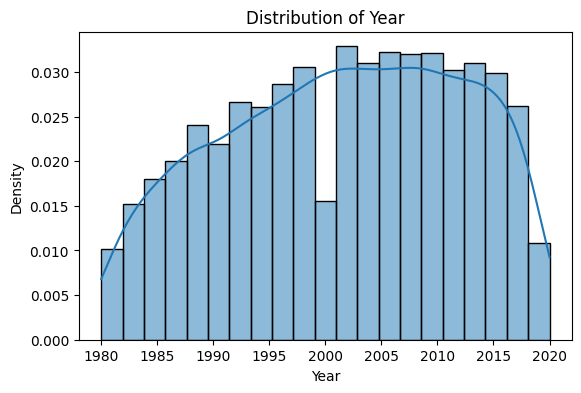

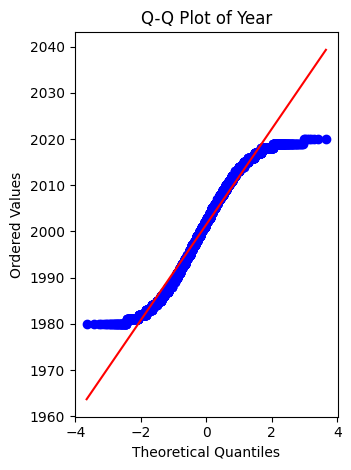

In [12]:
#Univariate Analysis of Year
plt.figure(figsize=(14, 4))

#histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Year'], kde=True, stat='density')
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Density')
plt.show()

#Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(df['Year'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Year')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')

plt.tight_layout()

plt.show()

Here is our graphs representing the univariate analysis of 'Year'

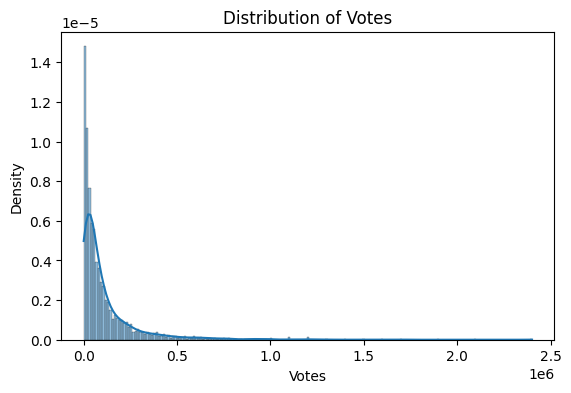

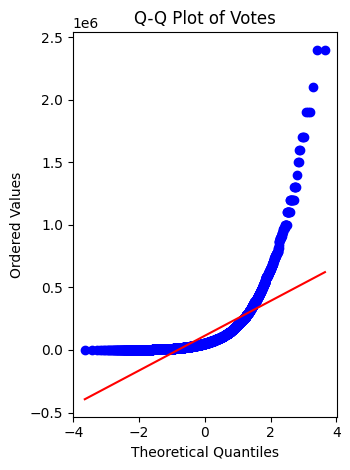

In [13]:
#Univariate Analysis of Votes
plt.figure(figsize=(14, 4))

#histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Votes'], kde=True, stat='density')
plt.title('Distribution of Votes')
plt.xlabel('Votes')
plt.ylabel('Density')
plt.show()

#Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(df['Votes'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Votes')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')

plt.tight_layout()
plt.show()

Here is our graphs representing the univariate analysis of 'Votes'

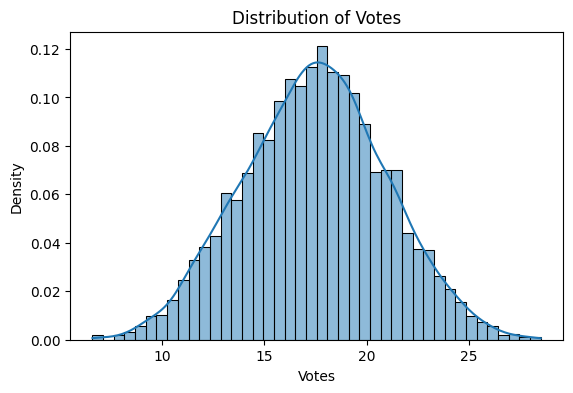

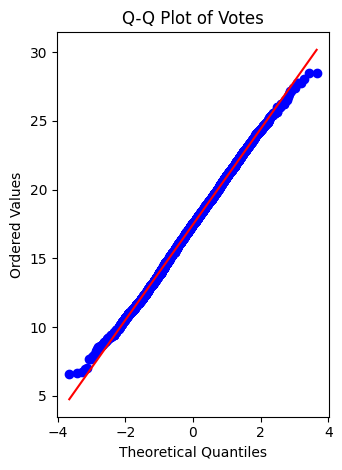

In [14]:
#Normalize the right skewed data
df['Votes'], lambda_votes = boxcox(df['Votes'])

plt.figure(figsize=(14, 4))

#histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Votes'], kde=True, stat='density')
plt.title('Distribution of Votes')
plt.xlabel('Votes')
plt.ylabel('Density')
plt.show()

#Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(df['Votes'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Votes')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')

plt.tight_layout()
plt.show()

Here is our graphs representing the univariate analysis of 'Votes' after normalizing our data

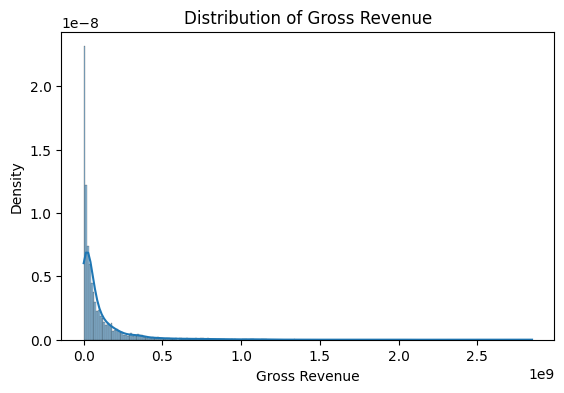

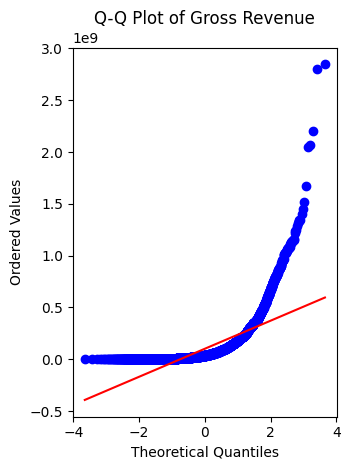

In [15]:
#Univariate Analysis of Gross Revenue
plt.figure(figsize=(14, 4))

#histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Gross Revenue'], kde=True, stat='density')
plt.title('Distribution of Gross Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('Density')
plt.show()

#Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(df['Gross Revenue'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Gross Revenue')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')

plt.tight_layout()
plt.show()

Here is our graphs representing the univariate analysis of 'Gross Revenue'

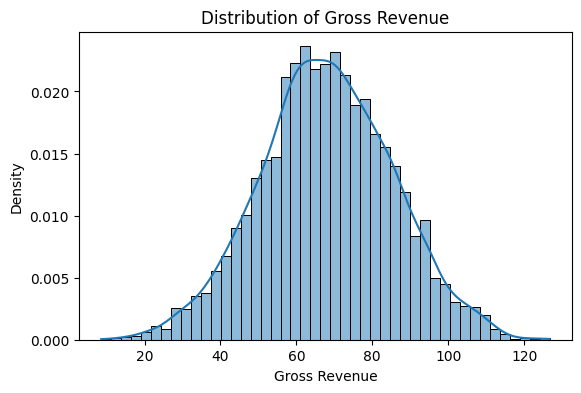

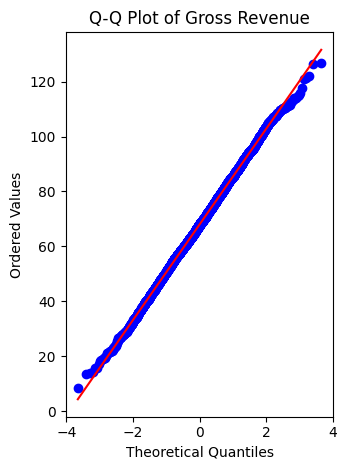

In [16]:
#Normalize the right skewed data
df['Gross Revenue'], lambda_gross = boxcox(df['Gross Revenue'])
plt.figure(figsize=(14, 4))

#histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Gross Revenue'], kde=True, stat='density')
plt.title('Distribution of Gross Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('Density')
plt.show()

#Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(df['Gross Revenue'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Gross Revenue')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')

plt.tight_layout()
plt.show()

Here is our graphs representing the univariate analysis of 'Gross Revenue' after normalizing it

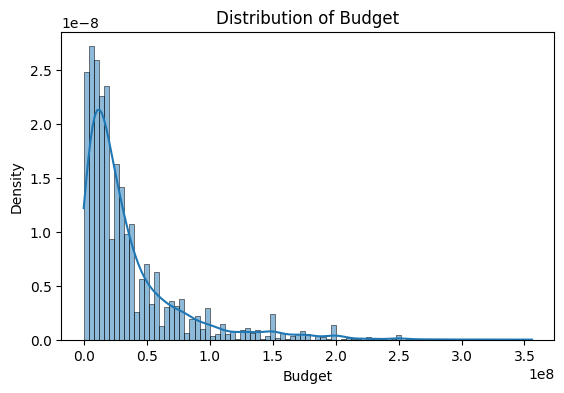

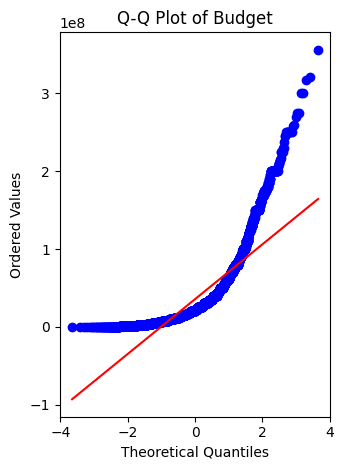

In [17]:
#Univariate Analysis of Budget
plt.figure(figsize=(14, 4))

#histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Budget'], kde=True, stat='density')
plt.title('Distribution of Budget')
plt.xlabel('Budget')
plt.ylabel('Density')
plt.show()

#Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(df['Budget'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Budget')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')

plt.tight_layout()
plt.show()

Here is our graphs representing the univariate analysis of 'Budget'

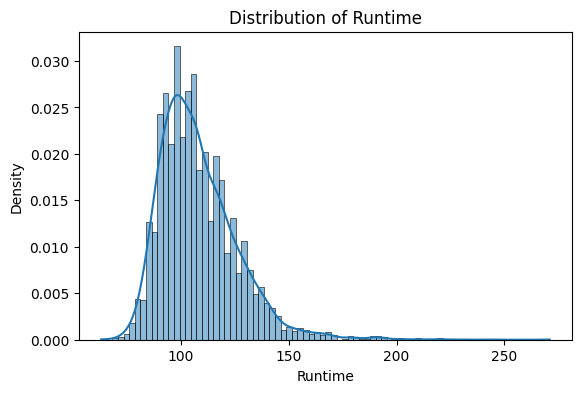

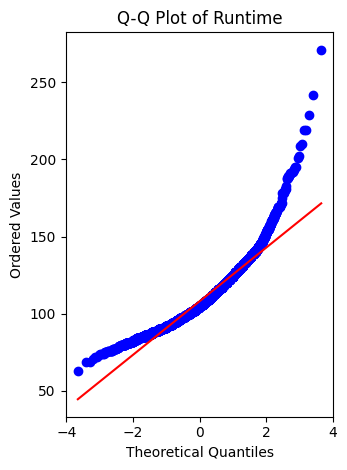

In [18]:
#Univariate Analysis of Runtime
plt.figure(figsize=(14, 4))

#histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Runtime'], kde=True, stat='density')
plt.title('Distribution of Runtime')
plt.xlabel('Runtime')
plt.ylabel('Density')
plt.show()

#Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(df['Runtime'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Runtime')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')

plt.tight_layout()
plt.show()

Here is our graphs representing the univariate analysis of 'Runtime'

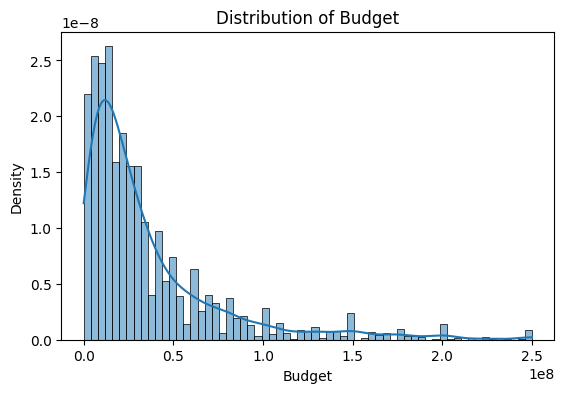

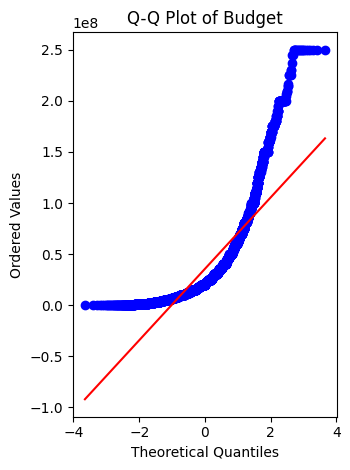

In [19]:
df['Budget'] = df['Budget'].apply(lambda x: 250000000 if x > 250000000 else x)

plt.figure(figsize=(14, 4))

#histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Budget'], kde=True, stat='density')
plt.title('Distribution of Budget')
plt.xlabel('Budget')
plt.ylabel('Density')
plt.show()

#Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(df['Budget'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Budget')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')

plt.tight_layout()
plt.show()


Here is our graphs representing the univariate analysis of 'Budget' after we cap the values above 250,000,000 to 250,000,000

### Univariate Analysis (Categorical Variables)

In [20]:
print("Unique Value Count of Categorical Variables")
print("Rating:", len(df['Rating'].unique()))
print("Genre:",len(df['Genre'].unique()))
print("Director:",len(df['Director'].unique()))
print("Writer:",len(df['Writer'].unique()))
print("Star:",len(df['Star'].unique()))
print("Country:",len(df['Country'].unique()))
print("Company:",len(df['Company'].unique()))

Unique Value Count of Categorical Variables
Rating: 10
Genre: 15
Director: 2045
Writer: 3178
Star: 1830
Country: 50
Company: 1464


Text(0.5, 1.0, 'Mean Score by Rating')

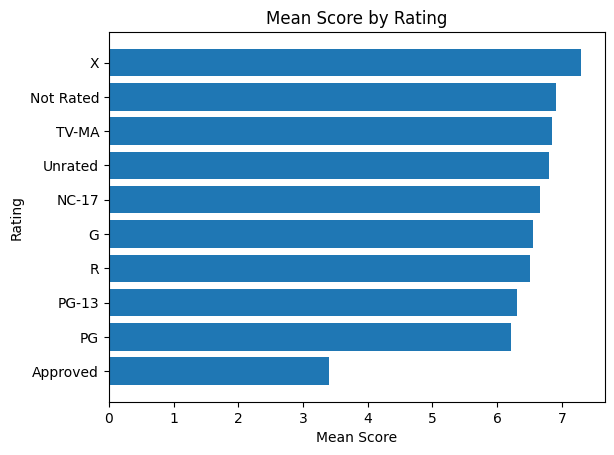

In [21]:
score_by_rating = df.groupby("Rating")["Score"].mean().sort_values(ascending=True)

plt.barh(score_by_rating.index, score_by_rating.values)
plt.xlabel('Mean Score')
plt.ylabel('Rating')
plt.title('Mean Score by Rating')

This horizontal bar chart displays the average scores for different content ratings of movies.

Text(0.5, 1.0, 'Mean Score by Genre')

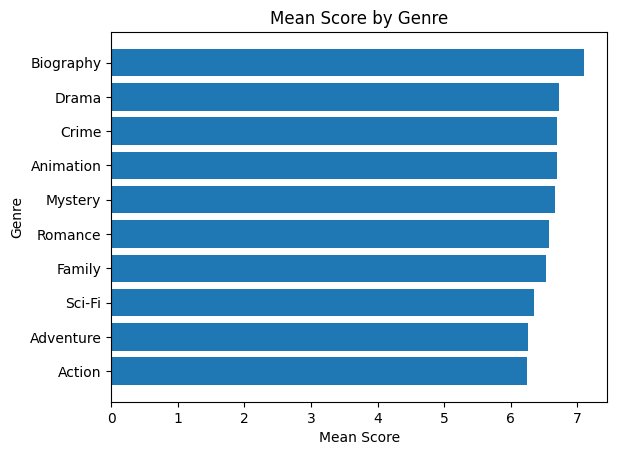

In [22]:
score_by_genre = df.groupby("Genre")["Score"].mean().sort_values(ascending=True)[len(df['Genre'].unique()) - 10 :]

plt.barh(score_by_genre.index, score_by_genre.values)
plt.xlabel('Mean Score')
plt.ylabel('Genre')
plt.title('Mean Score by Genre')

This horizontal bar chart displays the average scores for different movie genres.

Text(0.5, 1.0, 'Count by Genre')

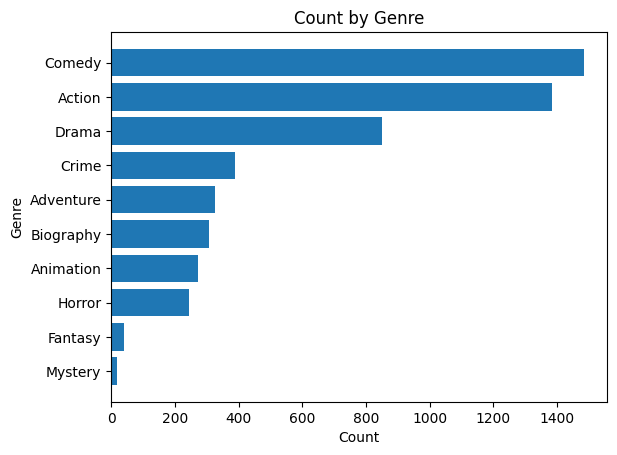

In [23]:
count_by_genre = df.groupby("Genre")["Score"].count().sort_values(ascending=True)[len(df['Genre'].unique()) - 10 :]

plt.barh(count_by_genre.index, count_by_genre.values)
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Count by Genre')

The bar chart illustrates the distribution across various genres of movies.

Text(0.5, 1.0, 'Mean Score by Country')

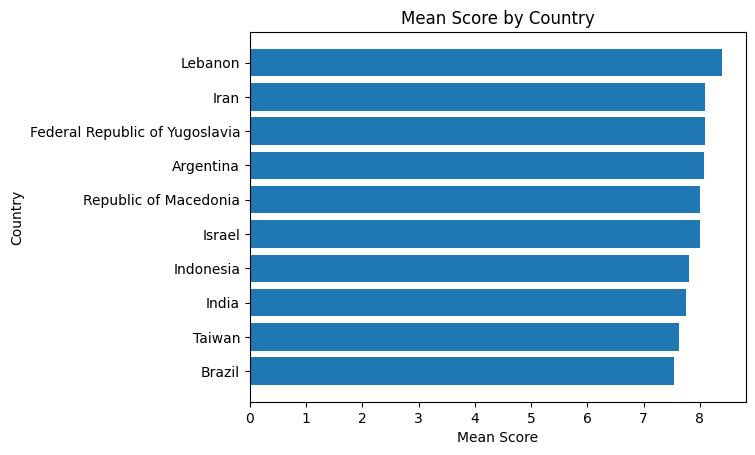

In [24]:
score_by_country = df.groupby("Country")["Score"].mean().sort_values(ascending=True)[len(df['Country'].unique()) - 10 :]

plt.barh(score_by_country.index, score_by_country.values)
plt.xlabel('Mean Score')
plt.ylabel('Country')
plt.title('Mean Score by Country')

This horizontal bar chart displays the average scores of movies released by various countries.

Text(0.5, 1.0, 'Count by Country')

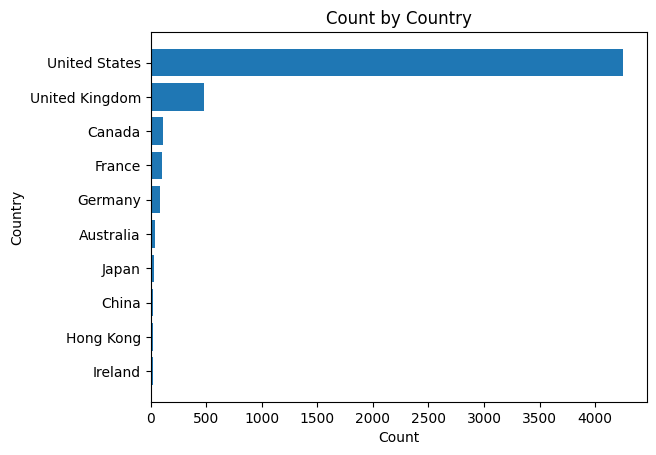

In [25]:
count_by_country = df.groupby("Country")["Score"].count().sort_values(ascending=True)[len(df['Country'].unique()) - 10 :]

plt.barh(count_by_country.index, count_by_country.values)
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Count by Country')

This horizontal bar chart displays the number of movies released by various countries.

Text(0.5, 1.0, 'Mean Score by Company')

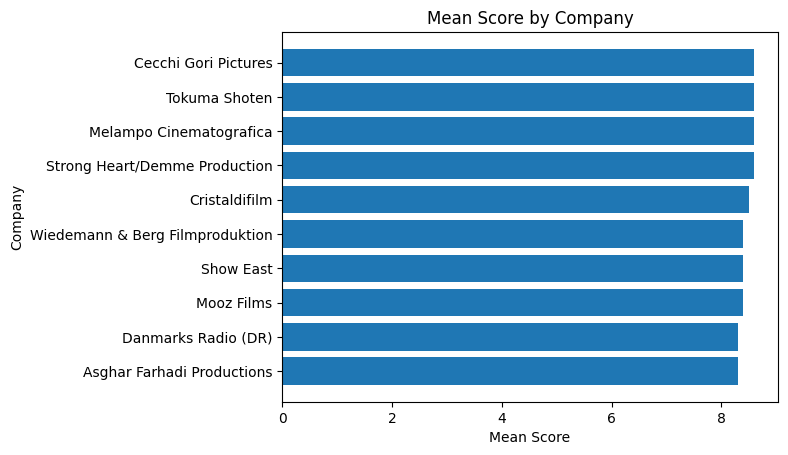

In [26]:
score_by_company = df.groupby("Company")["Score"].mean().sort_values(ascending=True)[len(df['Company'].unique()) - 10 :]

plt.barh(score_by_company.index, score_by_company.values)
plt.xlabel('Mean Score')
plt.ylabel('Company')
plt.title('Mean Score by Company')

This horizontal bar chart displays the average score released by various companies ordered from highest to lowest.

Text(0.5, 1.0, 'Mean Score by Company')

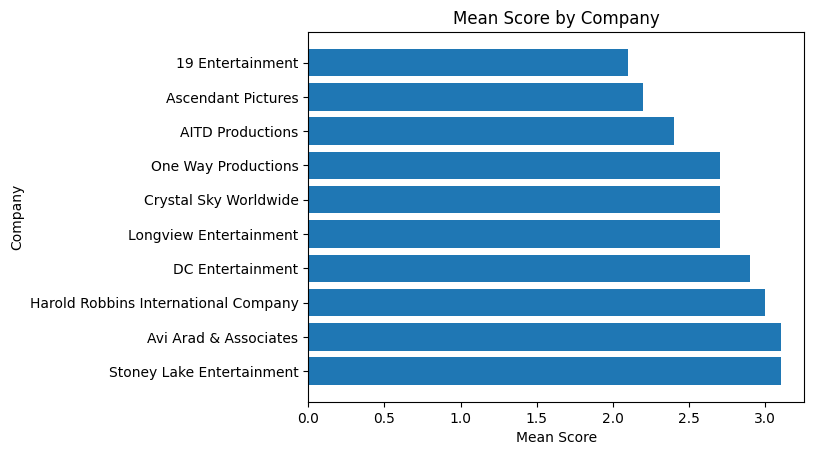

In [27]:
score_by_company = df.groupby("Company")["Score"].mean().sort_values(ascending=False)[len(df['Company'].unique()) - 10 :]

plt.barh(score_by_company.index, score_by_company.values)
plt.xlabel('Mean Score')
plt.ylabel('Company')
plt.title('Mean Score by Company')

This horizontal bar chart displays the average score released by various companies ordered in lowest to highest.

Text(0.5, 1.0, 'Count by Company')

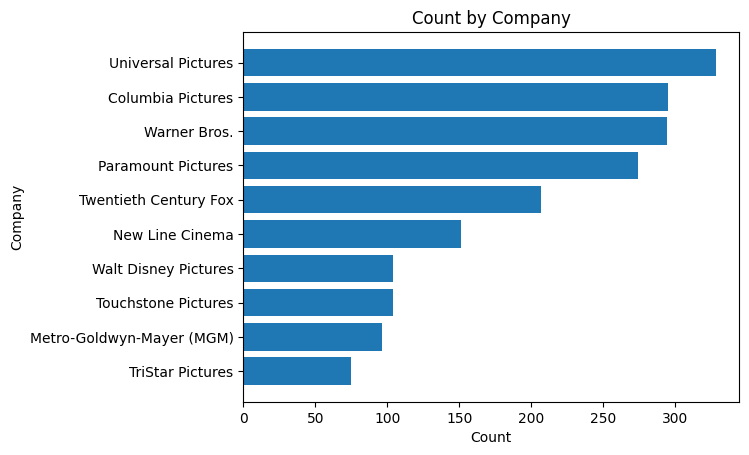

In [28]:
score_by_company = df.groupby("Company")["Score"].count().sort_values(ascending=True)[len(df['Company'].unique()) - 10 :]

plt.barh(score_by_company.index, score_by_company.values)
plt.xlabel('Count')
plt.ylabel('Company')
plt.title('Count by Company')

This horizontal bar chart displays the total count released by various companies.

### Data Transformation


In [29]:
# Instantiating MinMaxScaler and StandardScaler
scaler_minmax = MinMaxScaler()
scaler_std = StandardScaler()

# Scaling the columns
df[['Budget']] = scaler_minmax.fit_transform(df[['Budget']])
df[['Votes', 'Gross Revenue', 'Runtime']] = scaler_std.fit_transform(df[['Votes', 'Gross Revenue', 'Runtime']])

# Performing one-hot encoding on 'Rating', 'Genre', and 'Country' columns
oneHot = pd.get_dummies(df[['Rating', 'Genre', 'Country']], columns=['Rating', 'Genre', 'Country'])
df = pd.concat([df, oneHot], axis=1)
df.head()


,Name,Rating,Genre,Year,Released,Score,Votes,Director,Writer,Star,...,Country_Spain,Country_Sweden,Country_Switzerland,Country_Taiwan,Country_Thailand,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_West Germany,Country_Yugoslavia
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.400000,2.294269,Stanley Kubrick,Stephen King,Jack Nicholson,...,False,False,False,False,False,False,True,False,False,False
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.800000,0.173770,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,...,False,False,False,False,False,False,False,True,False,False
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.700000,2.525956,Irvin Kershner,Leigh Brackett,Mark Hamill,...,False,False,False,False,False,False,False,True,False,False
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.700000,1.092990,Jim Abrahams,Jim Abrahams,Robert Hays,...,False,False,False,False,False,False,False,True,False,False
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.300000,0.543980,Harold Ramis,Brian Doyle-Murray,Chevy Chase,...,False,False,False,False,False,False,False,True,False,False


### Bivariate Analysis

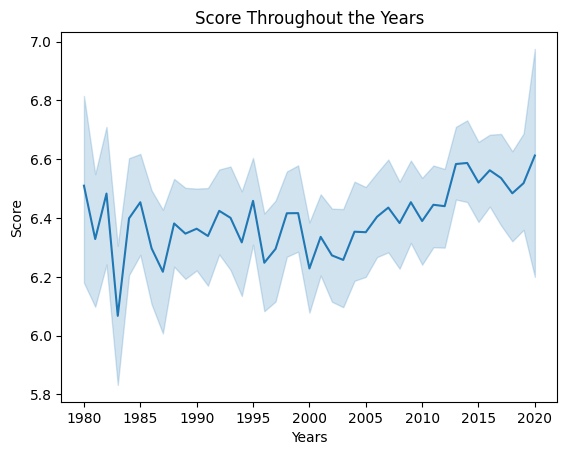

In [30]:
sns.lineplot(data=df, x="Year", y="Score")

plt.title('Score Throughout the Years')
plt.xlabel('Years')
plt.ylabel('Score')

# Show the plot
plt.show()

This is our graph representing the Bivariate analysis of 'Score' throughout the years

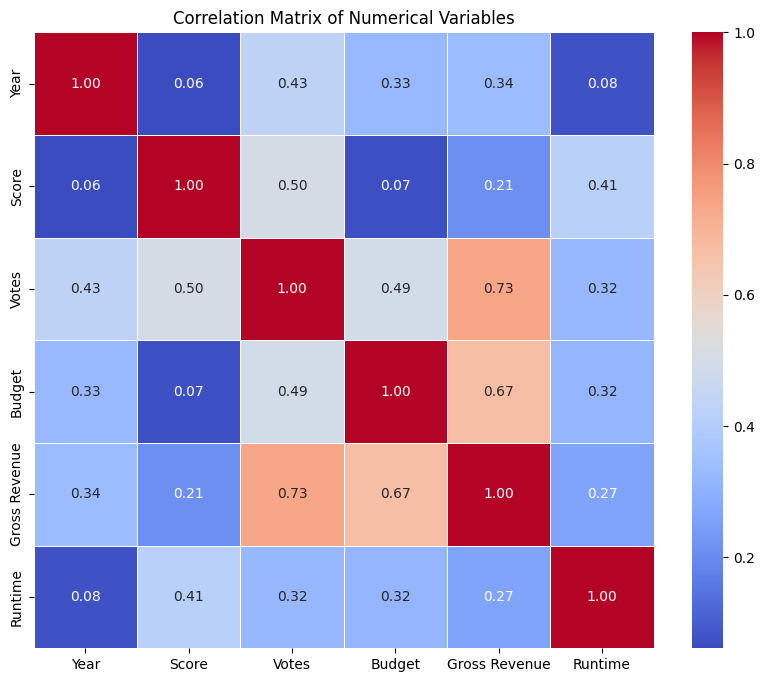

In [31]:
correlation_matrix = df[["Year", 'Score', "Votes", "Budget", "Gross Revenue", "Runtime"]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Training Model 1: Polynomial Regression

This is our correlation matrix of attributes that have numerical values

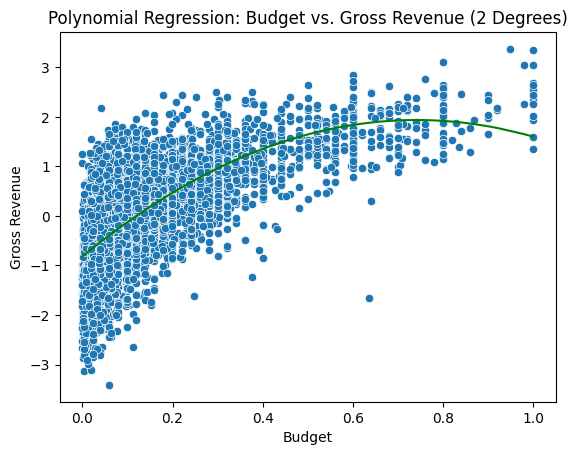

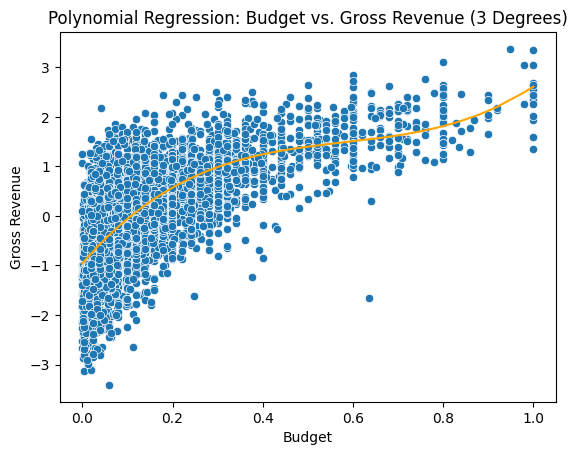

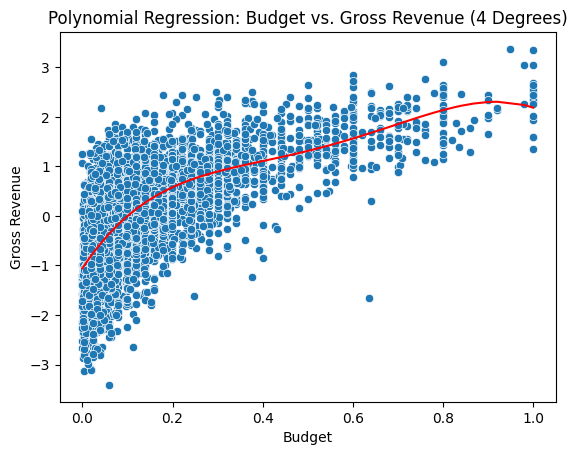

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

df_BGR = df[['Budget', 'Gross Revenue']]
X1_train, X1_test, y1_train, y1_test = train_test_split(df_BGR.Budget, df_BGR.drop(['Budget'], axis=1), test_size=0.2, random_state=21)

train = pd.concat([X1_train, y1_train], axis=1)
train = train.sort_values(by=['Budget'])
budget = train[['Budget']]
grossRevenue = train[['Gross Revenue']]

# 2 Degrees
poly2 = PolynomialFeatures(degree=2, include_bias=False)
polyX = poly2.fit_transform(budget)

linear = linear_model.LinearRegression()
linear.fit(polyX, grossRevenue)
yhat = linear.predict(polyX)

sns.scatterplot(data=df, x="Budget", y="Gross Revenue")
plt.plot(budget, yhat, color="green")
plt.title("Polynomial Regression: Budget vs. Gross Revenue (2 Degrees)")
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.show()

# 3 Degrees
poly3 = PolynomialFeatures(degree=3, include_bias=False)
polyX = poly3.fit_transform(budget)

linear = linear_model.LinearRegression()
linear.fit(polyX, grossRevenue)
yhat = linear.predict(polyX)

sns.scatterplot(data=df, x="Budget", y="Gross Revenue")
plt.plot(budget, yhat, color="orange")
plt.title("Polynomial Regression: Budget vs. Gross Revenue (3 Degrees)")
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.show()

# 3 Degrees
poly4 = PolynomialFeatures(degree=4, include_bias=False)
polyX = poly4.fit_transform(budget)

linear = linear_model.LinearRegression()
linear.fit(polyX, grossRevenue)
yhat = linear.predict(polyX)

sns.scatterplot(data=df, x="Budget", y="Gross Revenue")
plt.plot(budget, yhat, color="red")
plt.title("Polynomial Regression: Budget vs. Gross Revenue (4 Degrees)")
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.show()


This is our graph representing the Bivariate analysis of 'Budget' vs 'Gross Reveue'

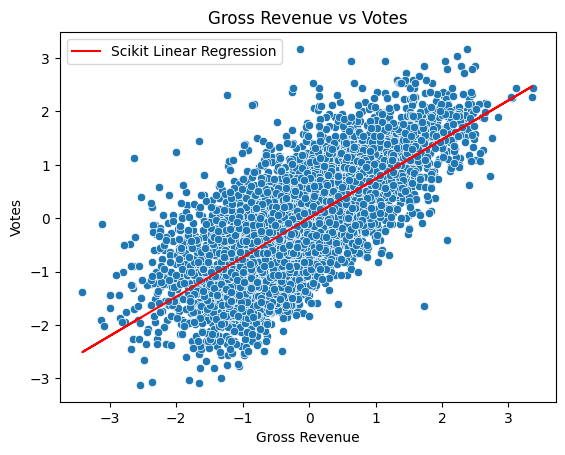

In [33]:
df_GRV = df[['Gross Revenue', 'Votes']]
X_train, X_test, y_train, y_test = train_test_split(df_GRV.drop(['Votes'], axis=1), df_GRV.Votes, test_size=0.2, random_state=21)

model = LinearRegression()
# Fit model to the data
model.fit(X_train, y_train)
# Predict Y values using the fitted model
Y_pred = model.predict(X_train)

# Plot the regression line
plt.plot(X_train, Y_pred, color='red', label='Scikit Linear Regression')
sns.scatterplot(data=df, x="Gross Revenue", y="Votes")
plt.title('Gross Revenue vs Votes')
plt.xlabel('Gross Revenue')
plt.ylabel('Votes')

plt.show()

This is our graph representing the Bivariate analysis of 'Gross Revenue' vs 'Votes'

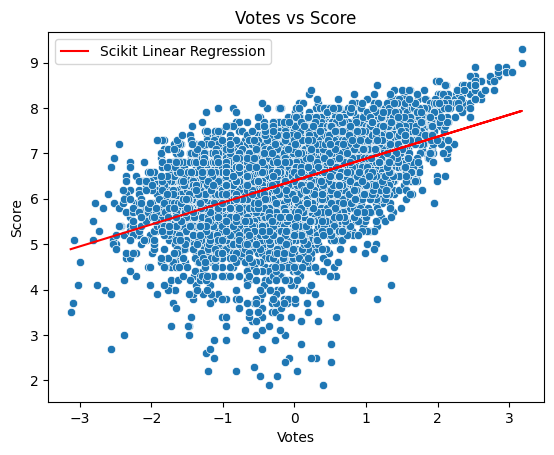

In [34]:
from sklearn import linear_model

df_VS = df[['Votes', 'Score']]
X_train, X_test, y_train, y_test = train_test_split(df_VS.drop(['Score'], axis=1), df_VS.Score, test_size=0.2, random_state=21)

model = LinearRegression()
# Fit model to the data
model.fit(X_train, y_train)
# Predict Y values using the fitted model
Y_pred = model.predict(X_train)

# Plot the regression line
plt.plot(X_train, Y_pred, color='red', label='Scikit Linear Regression')
sns.scatterplot(data=df, x="Votes", y="Score")
plt.title('Votes vs Score')
plt.xlabel('Votes')
plt.ylabel('Score')

plt.show()


This is our graph representing the Bivariate analysis of 'Vote' vs 'Score'

## Evaluate our First Model Compare Training vs Test Error

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


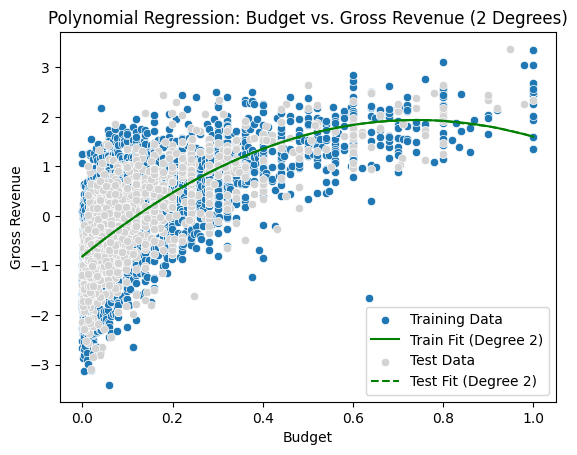

Degree 2 polynomial regression training MSE: 0.5122772588471408
Degree 2 polynomial regression testing MSE: 0.48057085037596825


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


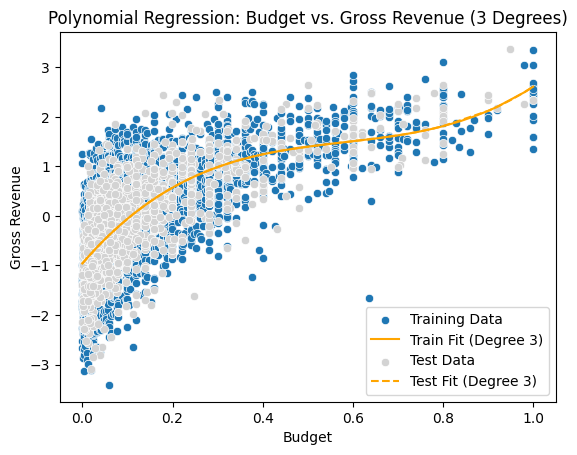

Degree 3 polynomial regression training MSE: 0.4983596198779291
Degree 3 polynomial regression testing MSE: 0.46815926813451286


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


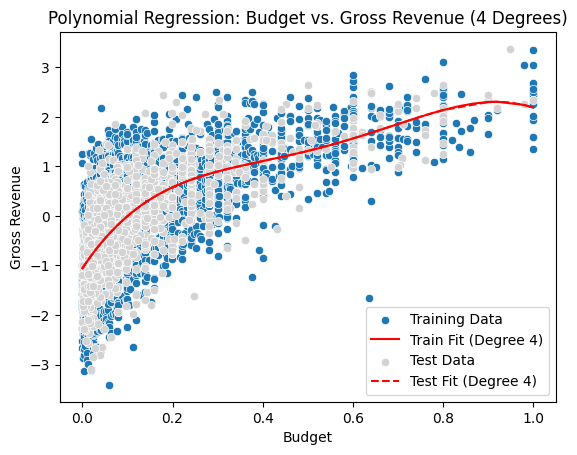

Degree 4 polynomial regression training MSE: 0.49328465218856743
Degree 4 polynomial regression testing MSE: 0.4652541188772717


In [35]:
# Function to evaluate and plot polynomial regression
def evaluate_poly_regression(degree, X_train, y_train, X_test, y_test, color):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    polyX_train = poly.fit_transform(X_train)
    polyX_test = poly.transform(X_test)
    
    linear = LinearRegression()
    linear.fit(polyX_train, y_train)
    
    # Predict on training and testing data
    yhat_train = linear.predict(polyX_train)
    yhat_test = linear.predict(polyX_test)
    
    # Calculate training and testing errors
    mse_train = mean_squared_error(y_train, yhat_train)
    mse_test = mean_squared_error(y_test, yhat_test)
    
    # Plotting for training data
    # Convert DataFrame/Series to numpy array and then flatten
    X_train_np = X_train.to_numpy().flatten() if hasattr(X_train, 'to_numpy') else X_train.flatten()
    y_train_np = y_train.to_numpy().flatten() if hasattr(y_train, 'to_numpy') else y_train.flatten()
    sns.scatterplot(x=X_train_np, y=y_train_np, label='Training Data')
    
    # Sort the values for better plotting
    sorted_train_indices = np.argsort(X_train_np)
    plt.plot(X_train_np[sorted_train_indices], yhat_train[sorted_train_indices], color=color, label=f'Train Fit (Degree {degree})')
    
    # Plotting for test data
    X_test_np = X_test.to_numpy().flatten() if hasattr(X_test, 'to_numpy') else X_test.flatten()
    y_test_np = y_test.to_numpy().flatten() if hasattr(y_test, 'to_numpy') else y_test.flatten()
    sns.scatterplot(x=X_test_np, y=y_test_np, label='Test Data', color='lightgrey')
    
    # Sort the values for better plotting
    sorted_test_indices = np.argsort(X_test_np)
    plt.plot(X_test_np[sorted_test_indices], yhat_test[sorted_test_indices], color=color, linestyle='--', label=f'Test Fit (Degree {degree})')
    plt.title(f"Polynomial Regression: Budget vs. Gross Revenue ({degree} Degrees)")
    plt.xlabel('Budget')
    plt.ylabel('Gross Revenue')
    plt.legend()
    plt.show()
    
    # Print errors
    print(f"Degree {degree} polynomial regression training MSE: {mse_train}")
    print(f"Degree {degree} polynomial regression testing MSE: {mse_test}")


# Evaluate and plot for 2 degrees
evaluate_poly_regression(2, budget, grossRevenue, X1_test.values.reshape(-1, 1), y1_test, "green")

# Evaluate and plot for 3 degrees
evaluate_poly_regression(3, budget, grossRevenue, X1_test.values.reshape(-1, 1), y1_test, "orange")

# Evaluate and plot for 4 degrees
evaluate_poly_regression(4, budget, grossRevenue, X1_test.values.reshape(-1, 1), y1_test, "red")

All three degrees 2, 3, and 4 are showing a good fit as seen by the testing MSE being lower than or very close to the training MSE. There is no evidence of overfitting, where we would expect the testing MSE to be significantly higher than the training MSE due to the model capturing noise in the training data.

## Model Fit In The Fitting Graph

Based on our MSE values, as the polynomial degree increases from 2 to 4, both training and testing MSEs decrease. This indicates that our model is capturing more of the data's underlying pattern with increased complexity, improving its performance. Our model with polynomial degree 4 have the lowest MSEs suggests an optimal balance between bias and variance, making it the best fit among the ones that we tested. There's no sign of overfitting as both training and testing error decreases together. In conclusion, our polynomial regression model with degree 4 provides the best balance of complexity and performance based on our data.

## Next 2 models

In light of the insights derived from the performance of our current neural network model, we are considering the exploration of two additional machine learning models to potentially enhance our predictive capabilities and address the identified limitations:

- **Neural Network**: Neural networks are indeed well-suited to handle the complexity inherent in modeling the relationship between a movie's budget and its gross revenue, thanks to their ability to model nonlinear relationships and interactions between features without the need for manual feature engineering. Unlike polynomial regression, which requires choosing the degree of polynomials a priori and risks overfitting with higher degrees, neural networks can learn complex patterns through their hidden layers and neurons. They do this by adjusting weights and biases through backpropagation based on the error rate, allowing them to capture both high-level and subtle nuances in data. Moreover, neural networks can automatically discover the interaction between variables, making them a powerful tool for capturing the multifaceted dynamics of movie revenues. The flexibility and adaptability of neural networks, combined with techniques to prevent overfitting such as dropout and regularization, make them an attractive option for improving upon traditional regression models in predicting outcomes with complex, non-linear relationships.

- **Decision Tree Classifier**: Despite the simplicity of decision trees, they are powerful for classification tasks and provide clear visualization of the decision-making process. A key advantage of using a Decision Tree Classifier is its interpretability; it allows for easy understanding of how decisions are made, which is invaluable for analyzing which features most significantly affect a movie's success. Furthermore, decision trees can handle non-linear data effectively and are less susceptible to outliers than regression models, making them a suitable choice for further exploration.

These models were chosen with the intention of addressing specific challenges observed in our initial approach. Polynomial regression will allow us to test the hypothesis that a more nuanced modeling of relationships between variables could yield better predictive performance. On the other hand, the Decision Tree Classifier offers a different approach to classification, with the potential for higher accuracy.

## What is the conclusion of your 1st model?

The improvement in MSE as the degree of the polynomial increases suggests that the relationship between budget and gross revenue is complex and potentially non-linear, with higher-degree polynomials capturing this complexity more effectively. The consistent decrease in both training and testing errors indicates that the model is not yet suffering from overfitting at the fourth degree.

However, it's important to note that while the improvements in MSE are consistent, they are also marginal, especially when moving from degree 3 to degree 4. This diminishing return suggests that there is a limit to how much more complexity (in terms of polynomial degree) can beneficially be added to the model without overfitting. The observation of diminishing returns as we increase the polynomial degree suggests a critical insight into the nature of modeling complex relationships, such as that between a movie's budget and its gross revenue. It emphasizes the inherent trade-offs in model development, especially between capturing the underlying data patterns (reducing bias) and maintaining a model's ability to generalize well to unseen data (avoiding overfitting).

The fact that the model is not yet overfitting at the fourth degree is encouraging, indicating there's still some, albeit limited, scope for complexity increase without sacrificing model performance on new data. However, the marginal gains observed caution us against pursuing higher degrees of polynomial without careful consideration. It suggests that we are approaching, if not already at, the point of optimal complexity where the model is sufficiently complex to capture the relevant patterns in the data but not so complex that it becomes overly specialized to the training set.

This situation underscores the importance of exploring alternative strategies for model improvement that do not solely rely on increasing model complexity through higher-degree polynomials. Techniques such as incorporating domain knowledge to engineer more relevant features, employing regularization methods to penalize unnecessary complexity, and exploring other forms of model validation like cross-validation to ensure that improvements are robust and generalizable, become paramount.

Moreover, this context also highlights the potential utility of exploring other modeling approaches that might inherently balance complexity and generalizability better. Machine learning models, such as random forests, gradient boosting machines, or neural networks, offer sophisticated mechanisms to model non-linear relationships and interactions without manually specifying the form of the model. These models come with their mechanisms to control overfitting, such as depth limitations in trees or dropout in neural networks, potentially providing a more effective way to capture the complexities of the relationship between movie budgets and gross revenue while maintaining good performance on unseen data.

## What can be done to possibly to improve it?

- **Regularization**: To prevent overfitting, especially when using higher-degree polynomials, consider applying regularization techniques such as Ridge or Lasso regression. These methods can help control the complexity of the model by penalizing large coefficients.

- **Feature Engineering**: Besides polynomial features, explore other forms of feature engineering. For instance, interaction terms between budget and other variables might provide additional insights. Also, normalizing or scaling the features might help, especially when moving towards models that use regularization.

- **Alternative Models**: Consider exploring non-linear models beyond polynomials, such as decision trees, random forests, or gradient boosting machines, which might capture the data's complexity in different ways.

- **Hyperparameter Tuning**: Use grid search or random search to find the optimal combination of hyperparameters, such as the degree of the polynomial and regularization strength. This systematic approach can help in identifying the best model configuration.

- **Non-Linear Transformations**: Before applying polynomial features, consider non-linear transformations on the input features, such as logarithmic, square root, or exponential transformations. These transformations can help in linearizing relationships between features and the target variable.


# Train Model 2: Neural Network Model

### Data Preprocessing

In [36]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# First, let's define the function to classify scores
def classify_score(score):
    if score <= 3:
        return 'very bad'
    elif score <= 5:
        return 'bad'
    elif score <= 8:
        return 'mid'
    else:
        return 'good'

# Create a new column 'group_rating' based on the score
df['group_rating'] = df['Score'].apply(classify_score)

# Selecting the required columns for features and target variable
X_movies = df[['Budget', 'Gross Revenue']]  # Features: budget and gross revenue
y_movies = df['group_rating']  # Target variable is now 'group_rating'

# Apply one-hot encoding to the target variable (rating)
encoder_movies = OneHotEncoder()
y_movies_encoded = encoder_movies.fit_transform(y_movies.values.reshape(-1, 1)).toarray()

# Apply min-max normalization to the 'budget' and 'gross' features
scaler_movies = MinMaxScaler()
X_movies_scaled = scaler_movies.fit_transform(X_movies)

df

,Name,Rating,Genre,Year,Released,Score,Votes,Director,Writer,Star,...,Country_Sweden,Country_Switzerland,Country_Taiwan,Country_Thailand,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_West Germany,Country_Yugoslavia,group_rating
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.400000,2.294269,Stanley Kubrick,Stephen King,Jack Nicholson,...,False,False,False,False,False,True,False,False,False,good
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.800000,0.173770,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,...,False,False,False,False,False,False,True,False,False,mid
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.700000,2.525956,Irvin Kershner,Leigh Brackett,Mark Hamill,...,False,False,False,False,False,False,True,False,False,good
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.700000,1.092990,Jim Abrahams,Jim Abrahams,Robert Hays,...,False,False,False,False,False,False,True,False,False,mid
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.300000,0.543980,Harold Ramis,Brian Doyle-Murray,Chevy Chase,...,False,False,False,False,False,False,True,False,False,mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.600000,0.739239,Adil El Arbi,Peter Craig,Will Smith,...,False,False,False,False,False,False,True,False,False,mid
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.500000,0.501529,Jeff Fowler,Pat Casey,Ben Schwartz,...,False,False,False,False,False,False,True,False,False,mid
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.600000,0.029252,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,...,False,False,False,False,False,False,True,False,False,mid
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.800000,-0.132540,Chris Sanders,Michael Green,Harrison Ford,...,False,False,False,False,False,False,False,False,False,mid


### Training and Testing the Neural Network

In [37]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
# Split the data into training and testing sets with a 90:10 ratio
X_train, X_test, y_train, y_test = train_test_split(X_movies_scaled, y_movies_encoded, test_size=0.1, random_state=42)

MFXACTIVATION ='relu'

model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation= MFXACTIVATION),  # Increased complexity and changed to ReLU
    Dense(32, activation=MFXACTIVATION),  # ReLU activation
    Dense(16, activation=MFXACTIVATION),  # ReLU activation
    Dense(8, activation=MFXACTIVATION),  # ReLU activation
    Dense(y_train.shape[1], activation='sigmoid')  # Output layer remains the same
])

optimizer = SGD(learning_rate=0.001)  # Adjusted learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1, callbacks=[early_stopping], verbose=1)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate metrics
cm = confusion_matrix(y_test_classes, y_pred_classes)
acc = accuracy_score(y_test_classes, y_pred_classes)
mse = mean_squared_error(y_test, y_pred)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted', zero_division=0)
recall = recall_score(y_test_classes, y_pred_classes, average='weighted', zero_division=0)

# Output the metrics
print("Confusion Matrix:", cm)
print("Accuracy:", acc)
print("MSE:", mse)
print("Precision:", precision)
print("Recall:", recall)

Epoch 1/100
136/136 [==============================] - 1s 3ms/step - loss: 1.2805 - accuracy: 0.8422 - val_loss: 1.1899 - val_accuracy: 0.9002
Epoch 2/100
136/136 [==============================] - 0s 2ms/step - loss: 1.1169 - accuracy: 0.8945 - val_loss: 1.0377 - val_accuracy: 0.9002
Epoch 3/100
136/136 [==============================] - 0s 1ms/step - loss: 0.9742 - accuracy: 0.8945 - val_loss: 0.9019 - val_accuracy: 0.9002
Epoch 4/100
136/136 [==============================] - 0s 1ms/step - loss: 0.8474 - accuracy: 0.8945 - val_loss: 0.7808 - val_accuracy: 0.9002
Epoch 5/100
136/136 [==============================] - 0s 1ms/step - loss: 0.7365 - accuracy: 0.8945 - val_loss: 0.6750 - val_accuracy: 0.9002
Epoch 6/100
136/136 [==============================] - 0s 1ms/step - loss: 0.6431 - accuracy: 0.8945 - val_loss: 0.5904 - val_accuracy: 0.9002
Epoch 7/100
136/136 [==============================] - 0s 1ms/step - loss: 0.5715 - accuracy: 0.8945 - val_loss: 0.5279 - val_accuracy: 0.9002

### k-fold Cross Validation

In [38]:
# Function to build the model, adapted for the Kaggle movie dataset
def build_movie_model():
    MFXACTIVATION ='relu'
    model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation= MFXACTIVATION),  # Increased complexity and changed to ReLU
    Dense(32, activation=MFXACTIVATION),  # ReLU activation
    Dense(16, activation=MFXACTIVATION),  # ReLU activation
    Dense(8, activation=MFXACTIVATION),  # ReLU activation
    Dense(y_train.shape[1], activation='sigmoid')  # Output layer remains the same
    ])
    model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', 'mse'])
    return model

# Wrap the Keras model with KerasClassifier
estimator_movies = KerasClassifier(model=build_movie_model, epochs=100, batch_size=10, verbose=1)  # Adjust verbosity as needed

# Define the cross-validation strategy
kfold_movies = RepeatedKFold(n_splits=10, n_repeats=1, random_state=42)

# Perform cross-validation for accuracy and MSE
results_movies = cross_validate(estimator_movies, X_movies_scaled, y_movies_encoded, cv=kfold_movies, scoring=['accuracy', 'neg_mean_squared_error'], n_jobs=1)

# Output results
print("Cross-validation results:")
print(results_movies)

Epoch 1/100
481/481 [==============================] - 2s 2ms/step - loss: 0.9572 - accuracy: 0.8905 - mse: 0.2142
Epoch 2/100
481/481 [==============================] - 1s 2ms/step - loss: 0.5007 - accuracy: 0.8950 - mse: 0.1805
Epoch 3/100
481/481 [==============================] - 1s 2ms/step - loss: 0.4383 - accuracy: 0.8950 - mse: 0.1693
Epoch 4/100
481/481 [==============================] - 1s 2ms/step - loss: 0.4315 - accuracy: 0.8950 - mse: 0.1645
Epoch 5/100
481/481 [==============================] - 1s 2ms/step - loss: 0.4285 - accuracy: 0.8950 - mse: 0.1622
Epoch 6/100
481/481 [==============================] - 1s 2ms/step - loss: 0.4264 - accuracy: 0.8950 - mse: 0.1604
Epoch 7/100
481/481 [==============================] - 1s 2ms/step - loss: 0.4246 - accuracy: 0.8950 - mse: 0.1594
Epoch 8/100
481/481 [==============================] - 1s 2ms/step - loss: 0.4231 - accuracy: 0.8950 - mse: 0.1582
Epoch 9/100
481/481 [==============================] - 1s 2ms/step - loss: 0.421

In [39]:
# Assuming 'results_movies' contains the cross-validation results from the previous step
cv_accuracy_movies = results_movies['test_accuracy']
cv_mse_movies = -1 * results_movies['test_neg_mean_squared_error']  # Multiply by -1 to make MSE positive

# Print accuracy and MSE values for each fold
for i in range(len(cv_accuracy_movies)):
    print(f"Fold {i+1}: Accuracy = {cv_accuracy_movies[i]}, MSE = {cv_mse_movies[i]}")

# Print the overall average accuracy and MSE for the Kaggle movie dataset
print(f"Overall Average Accuracy: {np.mean(cv_accuracy_movies)}")
print(f"Overall Average MSE: {np.mean(cv_mse_movies)}")


Fold 1: Accuracy = 0.9119850187265918, MSE = 0.044007490636704116
Fold 2: Accuracy = 0.9026217228464419, MSE = 0.048689138576779034
Fold 3: Accuracy = 0.9082397003745318, MSE = 0.04588014981273408
Fold 4: Accuracy = 0.8689138576779026, MSE = 0.06554307116104868
Fold 5: Accuracy = 0.8876404494382022, MSE = 0.056179775280898875
Fold 6: Accuracy = 0.8820224719101124, MSE = 0.058988764044943826
Fold 7: Accuracy = 0.8930581613508443, MSE = 0.053470919324577856
Fold 8: Accuracy = 0.8949343339587242, MSE = 0.0525328330206379
Fold 9: Accuracy = 0.9136960600375235, MSE = 0.04315196998123827
Fold 10: Accuracy = 0.9043151969981238, MSE = 0.04784240150093809
Overall Average Accuracy: 0.8967426973318998
Overall Average MSE: 0.05162865133405007


### Hyperparameter Tuning

In [40]:
# Split the data
X_train_hp, X_test_hp, y_train_hp, y_test_hp = train_test_split(X_movies_scaled, y_movies_encoded, test_size=0.1, random_state=42)
def build_hp_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=12, max_value=512, step=100),
                    activation='relu',
                    input_dim=X_train_hp.shape[1]))
    model.add(Dense(units=hp.Int('units_layer2', min_value=12, max_value=512, step=100), activation='relu'))
    model.add(Dense(units=hp.Int('units_layer3', min_value=12, max_value=512, step=100), activation='relu')) # changed to relu to match previous models
    model.add(Dense(units=hp.Int('units_layer4', min_value=12, max_value=512, step=100), activation='relu'))

    model.add(Dense(y_train_hp.shape[1], activation='sigmoid'))  # Adapted for multi-class classification

    # Tune the learning rate for the optimizer
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')

    model.compile(optimizer=SGD(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model
# Define the tuner
# tuner = kt.Hyperband(
#     build_hp_model,
#     objective='val_accuracy',
#     max_epochs=10,
#     hyperband_iterations=15,
#     directory='tuner_results',
#     project_name='kaggle_movie_tuning'
# )

# Define the tuner
tuner = kt.GridSearch(
    hypermodel=build_hp_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=3,
    seed=15,
    tune_new_entries=True,
    allow_new_entries=True,
    directory='tuner_results',
    project_name='kaggle_movie_tuning'
)

# Run the hyperparameter search
tuner.search(X_train_hp, y_train_hp, epochs=50, validation_split=0.1)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]

print(f"""
The optimal number of units in the first hidden layer is {best_hps.get('units')}
with an optimal learning rate of {best_hps.get('learning_rate')}.
""")

# we used early stopping in earlier versions of our sequential model, so we decide to use it
early_stopping = EarlyStopping(
    monitor='val_accuracy', # or 'val_loss' if you prefer to monitor loss
    patience=10,            # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restores model weights from the epoch with the best value of the monitored quantity
)

# Build the model with the optimal hyperparameters and evaluate it
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train_hp, y_train_hp, epochs=100, validation_data=(X_test_hp, y_test_hp), callbacks=[early_stopping])

Reloading Tuner from tuner_results/kaggle_movie_tuning/tuner0.json

The optimal number of units in the first hidden layer is 312
with an optimal learning rate of 0.00020221406050328463.

Epoch 1/100
151/151 [==============================] - 1s 3ms/step - loss: 1.3678 - accuracy: 0.6270 - val_loss: 1.3519 - val_accuracy: 0.9120
Epoch 2/100
151/151 [==============================] - 0s 2ms/step - loss: 1.3394 - accuracy: 0.8950 - val_loss: 1.3239 - val_accuracy: 0.9120
Epoch 3/100
151/151 [==============================] - 0s 2ms/step - loss: 1.3126 - accuracy: 0.8950 - val_loss: 1.2970 - val_accuracy: 0.9120
Epoch 4/100
151/151 [==============================] - 0s 2ms/step - loss: 1.2868 - accuracy: 0.8950 - val_loss: 1.2707 - val_accuracy: 0.9120
Epoch 5/100
151/151 [==============================] - 0s 2ms/step - loss: 1.2615 - accuracy: 0.8950 - val_loss: 1.2450 - val_accuracy: 0.9120
Epoch 6/100
151/151 [==============================] - 0s 2ms/step - loss: 1.2368 - accuracy: 0.89

## Evaluate our model compare training vs test error

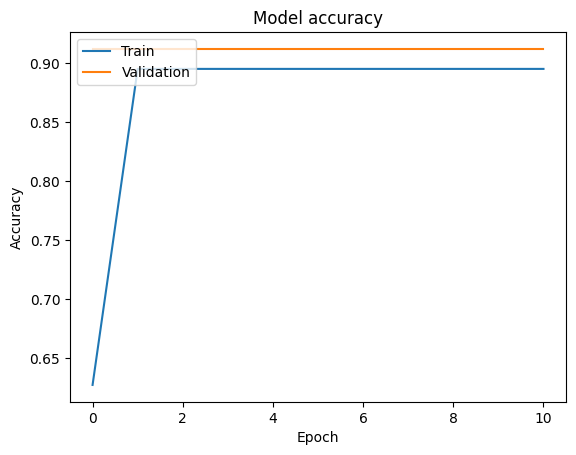

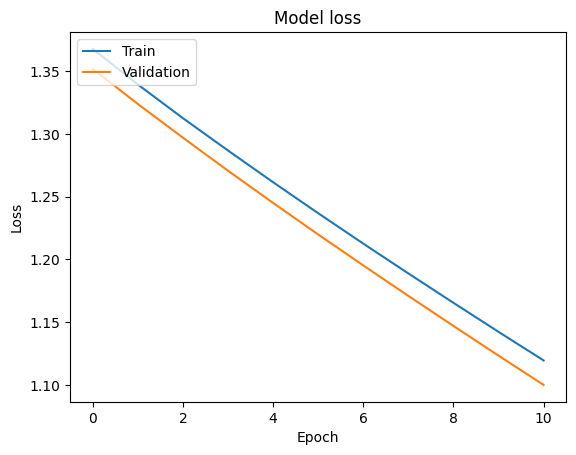

17/17 [==============================] - 0s 1ms/step
Confusion Matrix:
 [[  0   0  38]
 [  0   0   9]
 [  0   0 487]]
Accuracy: 0.9119850187265918
MSE: 0.1418090820897275
Precision: 0.831716674381742
Recall: 0.9119850187265918


In [41]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
# Calculate metrics
cm = confusion_matrix(y_test_classes, y_pred_classes)
acc = accuracy_score(y_test_classes, y_pred_classes)
mse = mean_squared_error(y_test, y_pred)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted', zero_division=0)
recall = recall_score(y_test_classes, y_pred_classes, average='weighted', zero_division=0)

# Output the metrics
print("Confusion Matrix:\n", cm)
print("Accuracy:", acc)
print("MSE:", mse)
print("Precision:", precision)
print("Recall:", recall)

**Model Accuracy graph**: The accuracy for both training and validation shoots up sharply and reaches a high level after the first epoch. After the initial jump, the accuracy for both remains approximately constant. It's noteworthy that the validation accuracy is slightly higher than the training accuracy, which is unusual but not necessarily a problem if the variance is small. This could sometimes happen due to the specific samples in the validation set or regularization effects.

**Model Loss graph**: The loss for both training and validation decreases sharply after the first epoch and continues to decrease gradually over subsequent epochs. The training and validation losses are very close to each other and converge towards a similar value, which indicates that the model is generalizing well without overfitting or underfitting. There's no sign of divergence, which is good.

**Confusion Matrix**: The confusion matrix indicates that our model did not correctly predict any of the samples for the first two classes, but predicted all samples that belonged to the third class. The model correctly identified 487 samples of the third class, which indicates that it has a strong bias towards this class.

**MSE**: The MSE is around 0.074, which might seem low, but MSE is not typically the best metric for classification problems, especially when dealing with categorical data.

**Accuracy**: The accuracy which is about 91.2% which is a bit misleading in this context, as it seems the model has learned to predict the majority class very well but fails to recognize the other classes.

**Precision**: The precision score is about 83.2%. This suggests that when the model predicts a class, it's correct about 83.2% of the time. However, this metric is weighted and might be influenced by the class imbalance.

**Recall**: The recall is equal to the accuracy. This means that the model is very good at detecting the positives of the third class. However, for the first two classes, the recall is 0% because the model failed to identify any true positives for these classes.

In conclusion, the model is likely suffering from a class imbalance issue, where it predicts the majority class well but fails to predict the minority classes. This is evidenced by the lack of true positives for the two classes in the confusion matrix.

## Model Fit In The Fitting Graph, How does it compare to your first model? 

The model has a high accuracy, precision and recall on both the training and validation data, which would suggest a good fit. This suggests that our second model performs well in predicting the "group ratings" based on the "Gross Revenue" and "Budget" of the movie and we can determine that "Gross Revenue" and "Budget" are good features in order to predict our target variable "group rating". 

The fitting graphs with MSE values for the polynomial regression indicate that the model's performance varies with the degree of the polynomial. As the degree increases, the model fits the training data better but could potentially overfit. While our second model shows high classification accuracy, the fitting graphs from our first model indicate the regression model's capability to predict a continuous outcome based on its input. They serve different purposes and thus, their performances are not directly comparable.

In conclusion, for the specific task of classifying movies into 'group ratings', your second model seems to have found a good balance and performs well according to the classification metrics. For the task of predicting 'Gross Revenue' from 'Budget', the regression analysis of our first model indicates a variable fit depending on the polynomial degree, and its performance should be assessed by how well it generalizes to new, unseen data.

## Did you perform hyper parameter tuning? K-fold Cross validation? Feature expansion? What were the results? 

We performed, Hyper parameter tuning and K-fold Corss validation, but we didn't did any feature expansion as what we did was grouping scores. What we did with Grouping scores mean that We transformed the continuous 'Score' variable into a categorical 'group_rating' variable. This process is a form of feature engineering, where we're creating a new feature based on existing data.

1. **K Fold Cross-Validation**
- Cross-Validation: Applied Repeated K-Fold cross-validation to assess the model's performance across different subsets of the data, ensuring the model's effectiveness and generalization capability. This approach helps in evaluating the model's stability and reliability across different data splits.
- Performance Metrics: The model's accuracy and mean squared error (MSE) were evaluated, providing insights into its classification performance and how close the predicted ratings are to the actual ratings, respectively.
- **Results**: The K-fold cross-validation results indicate that the neural network model exhibits consistent performance across different subsets of the data, with accuracies ranging from approximately 86.9% to 91.4% across ten folds and an overall average accuracy of 89.7%. The mean squared error (MSE) values, averaging at 0.0516, suggest the model's predictions are reasonably close to the actual values. This demonstrates the model's robustness and generalizability, confirming its ability to perform well across diverse data segments without significant overfitting or underfitting to the training data.

2. **Hyperparameter Tuning**
- Hyperparameter Search: Employed a hyperparameter tuning process (using Keras Tuner) to find the optimal model architecture and learning rate, which are crucial for achieving the best possible model performance.
- GridSearch: A GridSearch approach was selected, systematically exploring a range of predefined hyperparameter values to find the best combination, focusing on maximizing validation accuracy.
- Optimization Results: The process identified the optimal number of units in each layer and the learning rate for the SGD optimizer, which were then used to build and evaluate the best model configuration.
- **Results**: The hyperparameter tuning results reveal the identification of an optimal model configuration with 312 units in the first hidden layer and a learning rate of approximately 0.000202. This configuration resulted in a significant improvement in the model's performance during the initial training phases, showcasing high validation accuracies that indicate the model's capacity to make accurate predictions. The process of hyperparameter tuning has effectively pinpointed the most conducive parameters for maximizing the model’s accuracy, underlining the critical role of tuning in enhancing the predictive power and efficiency of machine learning models.









## Next model

In light of the insights derived from the performance of our current neural network model, we are considering the exploration of two additional machine learning models to potentially enhance our predictive capabilities and address the identified limitations:

**Decision Tree Classifier**: Despite the simplicity of decision trees, they are powerful for classification tasks and provide clear visualization of the decision-making process. A key advantage of using a Decision Tree Classifier is its interpretability; it allows for easy understanding of how decisions are made, which is invaluable for analyzing which features most significantly affect a movie's success. Furthermore, decision trees can handle non-linear data effectively and are less susceptible to outliers than regression models, making them a suitable choice for further exploration.

These models were chosen with the intention of addressing specific challenges observed in our initial approach. Polynomial regression will allow us to test the hypothesis that a more nuanced modeling of relationships between variables could yield better predictive performance. On the other hand, the Decision Tree Classifier offers a different approach to classification, with the potential for high 

## What is the conclusion of your 2nd model?

The second model demonstrates good performance in terms of accuracy, precision, and recall on both the training and validation datasets. These metrics are indicative of a model that is correctly identifying the majority of instances across the classes it was trained to predict. The consistent high performance on unseen validation data suggests that the model has generalized well beyond the training dataset.

However, it is important to consider the confusion matrix, which reveals that while the model excels at predicting a certain class, it may not be performing equally well across all classes. This could be a sign of class imbalance or that the model's predictive features such as 'Gross Revenue' and 'Budget' are particularly informative for one class but less so for others.

In conclusion, the second model is a robust classifier for the 'group ratings' based on the 'Gross Revenue' and 'Budget' features. It presents a high degree of accuracy, precision, and recall, which are strong indicators of its reliability.

## What can be done to possibly to improve it?

To refine our approach and enhance the model's predictive accuracy and reliability, we propose several strategies:

- **Data Augmentation**: Expanding our dataset with more variables or by integrating additional datasets could provide a richer context for analysis, helping the model to uncover more nuanced relationships between features and outcomes.

- **Advanced Feature Engineering**: Delving deeper into feature selection and transformation to emphasize more predictive variables. This could involve more sophisticated techniques to extract or combine features in ways that better capture the complexities of movie success.

- **Model Complexity Adjustment**: Experimenting with the neural network's architecture, such as layer depth and neuron count, to strike an optimal balance between model complexity and overfitting. This includes evaluating different activation functions, optimizers, and regularization methods.

- **Ensemble Methods**: Considering ensemble techniques, such as bagging or boosting, to improve model stability and accuracy. These methods can aggregate predictions from multiple models to reduce variance and bias.

- **Exploration of Alternative Models**: As previously mentioned, we plan to explore Polynomial Regression and Decision Tree Classifier models. These alternatives could offer new perspectives and methodologies for addressing the dataset's challenges, potentially overcoming limitations observed in the neural network model.


# Train Model 3: Decision Tree Classifier

### Base Model

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_movies_scaled, y_movies_encoded, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

### Evaluate your model compare training vs test error

In [45]:
y_train_pred = clf.predict(X_train)

print("Training Set Evaluation:")
print(classification_report(y_train, y_train_pred, target_names=encoder_movies.categories_[0]))
print('Training Accuracy:', accuracy_score(y_train, y_train_pred))

y_test_pred = clf.predict(X_test)

print("\nTesting Set Evaluation:")
print(classification_report(y_test, y_test_pred, target_names=encoder_movies.categories_[0]))
print('Testing Accuracy:', accuracy_score(y_test, y_test_pred))

Training Set Evaluation:
              precision    recall  f1-score   support

         bad       1.00      1.00      1.00       321
        good       1.00      1.00      1.00       105
         mid       1.00      1.00      1.00      3816
    very bad       1.00      1.00      1.00        26

   micro avg       1.00      1.00      1.00      4268
   macro avg       1.00      1.00      1.00      4268
weighted avg       1.00      1.00      1.00      4268
 samples avg       1.00      1.00      1.00      4268

Training Accuracy: 1.0

Testing Set Evaluation:
              precision    recall  f1-score   support

         bad       0.07      0.08      0.08        72
        good       0.20      0.19      0.20        26
         mid       0.91      0.90      0.90       969
    very bad       0.00      0.00      0.00         1

   micro avg       0.82      0.82      0.82      1068
   macro avg       0.30      0.29      0.29      1068
weighted avg       0.84      0.82      0.83      1068
 sam

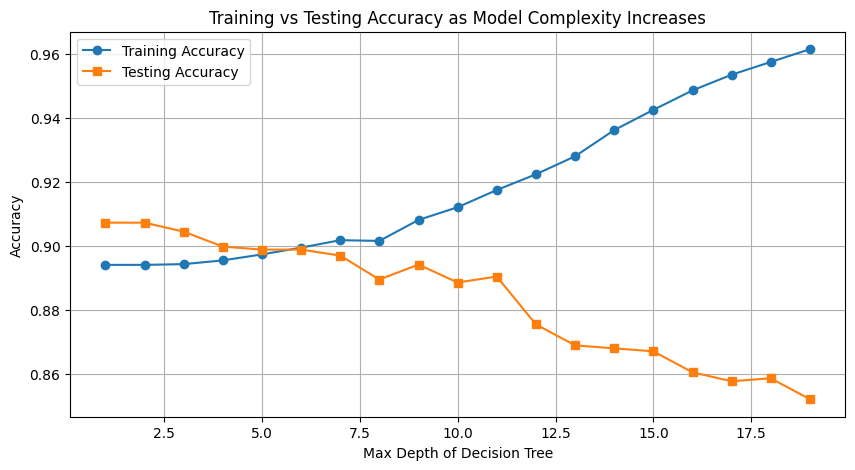

In [46]:
max_depth_range = range(1, 20)
train_accuracies = []
test_accuracies = []

for max_depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_accuracy)
    
    test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(10, 5))
plt.plot(max_depth_range, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(max_depth_range, test_accuracies, label='Testing Accuracy', marker='s')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy as Model Complexity Increases')
plt.legend()
plt.grid(True)
plt.show()

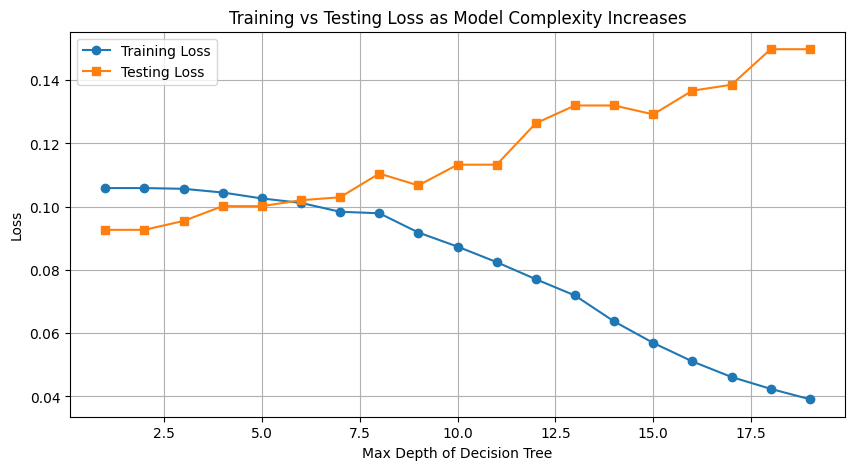

In [47]:
max_depth_range = range(1, 20)
train_losses = []
test_losses = []

for max_depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_loss = 1 - train_accuracy
    train_losses.append(train_loss)
    
    test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_loss = 1 - test_accuracy
    test_losses.append(test_loss)

plt.figure(figsize=(10, 5))
plt.plot(max_depth_range, train_losses, label='Training Loss', marker='o')
plt.plot(max_depth_range, test_losses, label='Testing Loss', marker='s')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Loss')
plt.title('Training vs Testing Loss as Model Complexity Increases')
plt.legend()
plt.grid(True)
plt.show()


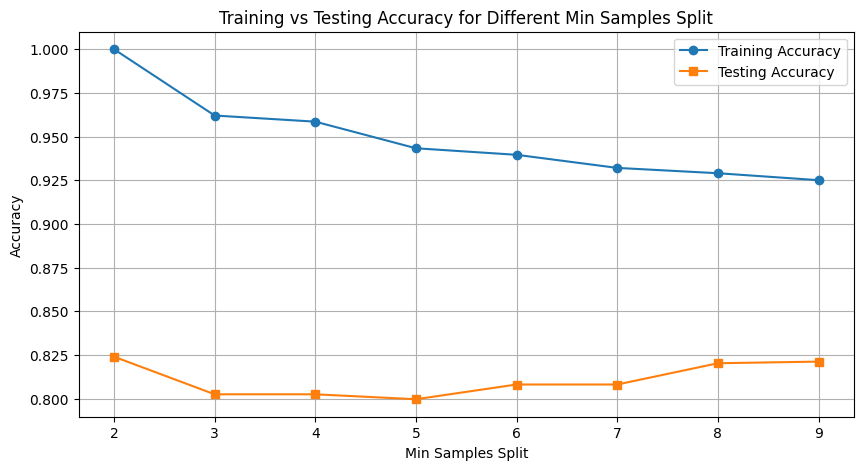

In [48]:
min_samples_split = range(2, 10)
train_accuracies = []
test_accuracies = []

for min_sample_split in min_samples_split:
    clf = DecisionTreeClassifier(min_samples_split=min_sample_split)
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_accuracy)

    test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(10, 5))
plt.plot(min_samples_split, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(min_samples_split, test_accuracies, label='Testing Accuracy', marker='s')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy for Different Min Samples Split')
plt.legend()
plt.grid(True)
plt.show()

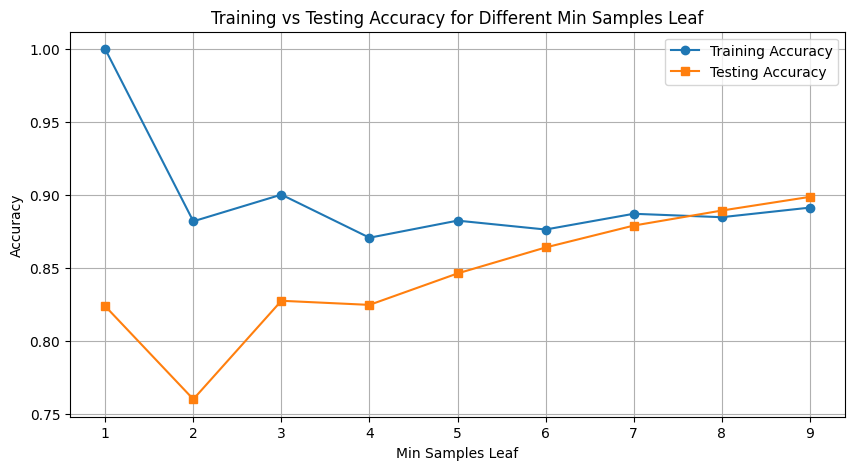

In [49]:
min_samples_leaf_range = range(1, 10)
train_accuracies = []
test_accuracies = []

for min_samples_leaf in min_samples_leaf_range:
    clf = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_accuracy)
    
    test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(10, 5))
plt.plot(min_samples_leaf_range, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(min_samples_leaf_range, test_accuracies, label='Testing Accuracy', marker='s')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy for Different Min Samples Leaf')
plt.legend()
plt.grid(True)
plt.show()

**Model Accuracy Graph**: Similar to the previous models, we want to see how the accuracy and training test react as we overfit by changing the hyperparameters of the decision tree. According to our graphs, our training accuracy increases as we increase the maximum depth of the decision tree while the testing accuracy decrease. These the training and testing data intersect when the maximum depth is around 6. As we increase the number of min splits, the training accuracy decreases while the testing accuracy initially decreases, but then increases. The highest accuracy is achieved when number of min split is 2. Lastly, as the number of min sample leaf increases, the training accuracy decreases while the testing accuracy increases. The testing and training data intersect at a value of 7.5 This might indicate that the decision tree performs well at a higher value of maximum depth and min sample leaf, and a lower value of min split.

**Model Loss Graph**: The error/loss for our graph is simply loss = 1 - accuracy. As we increase the max depth of the decision tree, the testing loss increases while our training set decreases which intersects at around a maximum depth of 6.

**Accuracy**: Our decision tree yielded an accuracy of 100% with our training set which indicates overfitting of the data. This is evident in the result of our testing set which yielded an accuracy of about 83%.

**Precision**: Our decision tree yielded an precision of 100% with our training set which indicates overfitting of the data. This is evident in the result of our testing set which yielded an weighted precision of about 84%.

**Recall**: Our decision tree yielded an recall of 100% with our training set which indicates overfitting of the data. This is evident in the result of our testing set which yielded an weighted recall of about 83%.

### Hyperparameter Tuning

In [50]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 20),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 10)
}

clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print('Best parameters:', grid_search.best_params_)
best_clf = grid_search.best_estimator_

y_train_pred = best_clf.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)
print('Training Accuracy:', training_accuracy)

y_test_pred = best_clf.predict(X_test)
testing_accuracy = accuracy_score(y_test, y_test_pred)
print('Testing Accuracy:', testing_accuracy)

Best parameters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training Accuracy: 0.8940955951265229
Testing Accuracy: 0.9073033707865169


In [63]:
y_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_classes, y_pred_classes)
rating_column_names = encoder_movies.get_feature_names_out(input_features=['y_movies'])
print(rating_column_names)
print(cm)

['y_movies_bad' 'y_movies_good' 'y_movies_mid' 'y_movies_very bad']
[[  0   0  72   0]
 [  0   0  26   0]
 [  0   0 969   0]
 [  0   0   1   0]]


## Where does your model fit in the fitting graph, how does it compare to your first model?

After performing hypertuning with our decision tree model, our final decision tree model performs exceptionally well in the training data and performs well in the test data as well. Using the same features used in the previous model based on the "Gross Revenue" and "Budget", we are able to predict our target variable group ratings really well similar to our second model in which both the second model and the third model with an accuracy reaching up around 90%.

However as mentioned previously, fitting graphs with MSE values for the polynomial regression indicate that the model's performance varies with the degree of the polynomial. As the degree increases, the model fits the training data better but could potentially overfit. While our second model shows high classification accuracy, the fitting graphs from our first model indicate the regression model's capability to predict a continuous outcome based on its input. They serve different purposes and thus, their performances are not directly comparable.

In conclusion, for the specific task of classifying movies into 'group ratings', our second and third model seems to have similar performance in performing classification according to the accuracy metrics. And as mentioned in the second model, the task of predicting 'Gross Revenue' from 'Budget', the regression analysis of our first model indicates a variable fit depending on the polynomial degree, and its performance should be assessed by how well it generalizes to new, unseen data.

## Did you perform hyper parameter tuning? K-fold Cross validation? Feature expansion? What were the results?

**1. Hyperparameter Tuning**
- Hyperparameter tuning was conducted using GridSearchCV, focusing on the criterion, max depth, min samples split, and min samples leaf
- The tuning was conducted with 5 cross validations and scored using accuracy
- Based on our tuning, using Gini with a max depth of 1, min sample leaf of 1, and min sample split of 2 yielded the best accuracy
- CV=5 mitigates the risk of overfitting and ensures the performance metrics not to be overly optimistic
- Our testing accuracy increased from about 83% to 90%, indicating a 7% improvement from our base model

## What is the conclusion of your 3rd model?

The third model demonstrates strong performance across various evaluation metrics, including accuracy, precision, and recall, on both the training and testing datasets. These metrics suggest that the model effectively identifies the majority of instances across its predicted classes, indicating its proficiency in capturing underlying patterns within the data. Moreover, the model exhibits consistent high performance on the testing data, implying that it has successfully generalized beyond the constraints of the training dataset.

However, a detailed examination of the confusion matrix reveals certain tendencies of the model to misclassify "mid" movies as "bad" and vice versa. Despite these occasional misclassifications, the model's overall performance remains robust. These insights underscore the importance of considering nuanced aspects of model performance beyond aggregate metrics, allowing for a more comprehensive evaluation of its predictive capabilities.

In conclusion, the third model emerges as a reliable classifier for predicting 'group ratings' based on the 'Gross Revenue' and 'Budget' features. Its high degree of accuracy, precision, and recall are strong indicators of its reliability and effectiveness, making it a good model.

## What can be done to possibly to improve it?

To refine our approach and enhance the model's predictive accuracy and reliability, we propose several strategies:

- **Increase Cross-Validation Folds:** Increasing the number of folds in cross-validation can lead to a more reliable estimate of model performance. By using more folds, each instance in the dataset gets to be in the test set exactly once and in the training set K−1 times (where K is the number of folds), providing a more comprehensive evaluation of the model's performance across different subsets of the data. </br></br>

- **Expand the Parameter Grid:** Extending the range or adding new parameters to the param_grid can potentially lead to finding a better model. </br></br>

- **Implement Randomized Search:** Instead of using GridSearchCV, we can use RandomizedSearchCV which samples a given number of candidates from the parameter space with a specified distribution. This approach can be more efficient than Grid Search and provide a good approximation of the best parameters with significantly less computational time. </br></br>

- **Feature Engineering and Selection:** We could create new features from existing ones through domain knowledge and select the most relevant features in the data. By doing so, we can implement feature importance scores for feature selection which can lead to a more effective and efficient model. </br></br>

# Results

### Data Preprocessing

The data preprocessing was used to refine the input for the neural network. We made a function called classify_score to segment movie scores into categorical bands, 'very bad' for scores up to 3, 'bad' for those up to 5, 'mid' for scores up to 8, and 'good' for any higher. This categorization was actualized by generating a new column, 'group_rating', applying the classification function to the existing 'score' data. The analysis then proceeded to isolate 'Budget' and 'Gross Revenue' as the feature set, positing these financial metrics as predictors, while 'group_rating' was established as the target variable, reflecting the categorized movie ratings.

To accommodate the categorical nature of the target variable within a neural network's computational framework, one-hot encoding was employed, transforming 'group_rating' into a binary matrix essential for model interpretation. Concurrently, feature scaling was conducted through min-max normalization on the 'Budget' and 'Gross Revenue' variables, thereby enhancing the algorithm's convergence efficiency. Through these steps, the dataset was optimally preprocessed to support the subsequent neural network's learning and predictive accuracy.

### Data Exploration

### Model 1: Polynomial Regression

Our polynomial regression analysis involved assessing the relationship between movie budgets and gross revenue across polynomial degrees 2, 3, and 4. The results are encapsulated in the following figures:

1. **Polynomial Degree 2**: The scatter plot with a second-degree polynomial fit reveals the basic quadratic relationship between the budget and gross revenue.
2. **Polynomial Degree 3**: Increasing the polynomial degree to 3 showed a more flexible fit to the data, indicating a more complex relationship.
3. **Polynomial Degree 4**: The fourth-degree polynomial regression provided the most nuanced fit among the tested models, suggesting a more detailed underlying pattern.

#### Training vs. Test Error Evaluation

- **Degree 2**: The evaluation of the second-degree polynomial model showed a mean squared error (MSE) of 0.51227 for training data and 0.48057 for testing data.
- **Degree 3**: For the third-degree polynomial model, the training MSE was 0.49835 and the testing MSE was 0.46815, suggesting a better fit than the second degree.
- **Degree 4**: The most complex model, with a fourth-degree polynomial, achieved a training MSE of 0.49328 and a testing MSE of 0.46525.

#### Model Fit in the Fitting Graph

The fitting graph analysis clearly showed that as the polynomial degree increases from 2 to 4, both training and testing MSEs decreased. This trend implies that our models are effectively capturing more of the complexity inherent in the data with each incremental degree. The fourth-degree polynomial regression, having the lowest MSEs, was deemed the best fit among the tested models. Importantly, there was no evidence of overfitting, as indicated by the parallel decrease of both training and testing errors. The fourth-degree polynomial model emerged as the optimal balance between complexity and performance based on the dataset.

These findings suggest that higher-degree polynomial regression can effectively model the non-linear relationship between movie budgets and gross revenue. However, the careful selection of polynomial degree is crucial to avoid overfitting while still capturing the underlying data pattern with sufficient complexity. The results from our polynomial regression models inform our understanding of the financial dynamics in the movie industry, providing valuable insights into how budgetary decisions can influence a movie's commercial success.

### Model 2: Neural Network

#### Data Preprocessing
Our neural network model's preprocessing involved creating a new target variable 'group_rating' derived from the 'Score' feature, which classifies movies into 'very bad,' 'bad,' 'mid,' and 'good' categories. We selected 'Budget' and 'Gross Revenue' as feature inputs, applied one-hot encoding to the target variable, and performed MinMax scaling on the inputs to normalize the data.

#### Training and Testing Performance
The neural network was trained and tested, revealing the following results:

- Confusion Matrix indicated a strong bias towards one class, with the model correctly predicting all samples of the third class but none for the first two.
- Accuracy was high at 91.2%, which should be interpreted cautiously due to the apparent class imbalance.
- Mean Squared Error (MSE) stood at 0.0931, less indicative due to the classification nature of the problem.
- Precision was recorded at 83.2%, suggesting the model was mostly correct when it made predictions, albeit likely skewed by class imbalance.
- Recall matched the accuracy, again reflecting the bias towards the third class.

#### K-Fold Cross-Validation
K-Fold cross-validation demonstrated the model's consistent performance, with an overall average accuracy of approximately 89.7% and an average MSE of 0.0516, indicating robustness across different data segments. The variance in accuracy and MSE suggested some susceptibility to overfitting on particular subsets of the data.

#### Hyperparameter Tuning
Hyperparameter tuning identified an optimal configuration for the neural network model, indicating that 312 units for the first hidden layer and a learning rate of about 0.0002 are best suited for this analysis.

#### Model Accuracy and Loss Over Epochs
Training and validation accuracy graphs showed an initial surge followed by a plateau, with the validation accuracy peculiarly higher than training accuracy. Loss graphs for both sets decreased consistently over epochs, indicative of good generalization and no evidence of overfitting or underfitting.

#### Analysis
The model demonstrated high classification accuracy for the 'group ratings' based on 'Gross Revenue' and 'Budget'. However, the analysis indicates a potential class imbalance, as shown by the model's inability to predict the minority classes accurately.

In conclusion, while the neural network model exhibits strong predictive accuracy, it is prone to bias toward the majority class, a challenge that future iterations of the model must address to improve class-specific predictive performance.

### Model 3: Decision Tree Classifier

#### Data Preprocessing
Our decision tree preprocessing involved creating a new target variable 'group_rating' derived from the 'Score' feature, which classifies movies into 'very bad,' 'bad,' 'mid,' and 'good' categories, and applied one-hot encoding to the target variable. We selected 'Budget' and 'Gross Revenue' as feature inputs and performed MinMax scaling on the feature inputs to normalize the data.

#### Training and Testing Performance
The decision tree was trained and tested, revealing the following results:

- Confusion Matrix indicated a tendency of the model to misclassify "mid" movies as "bad" and vice versa.
- Accuracy was high at about 90%, which should be interpreted cautiously due to the apparent class imbalance.
- Precision was recorded at about 84%, suggesting the model was mostly correct when it made predictions, albeit likely skewed by class imbalance.
- Recall was recorded at about 83%, again reflecting the bias towards the "mid" and "bad" movies.

#### Hyperparameter Tuning
Hyperparameter tuning identified that using Gini with a max depth of 1, min sample leaf of 1, and min sample split of 2 yielded the best accuracy, increasing our testing accuracy from about 83% to 90%

#### Analysis
The model demonstrated high classification accuracy for the 'group ratings' based on 'Gross Revenue' and 'Budget'. However, the analysis indicates a potential class imbalance, as shown by the model tend to misclassify "mid" movies as "bad" and vice versa, which is a further issue to address to improve the predictive performance of the model.

# Discussion

Our exploration into the intricate world of cinema through the lens of data science has led us to some interesting findings. In this section, we delve deep into the interpretation, significance, and limitations of our results and approach framing them within the broader context of film analytics. This discussion is rooted in our initial objective: to unravel the complex relationship between movie budgets, box office performance, critical reception, and audience preferences.

#### Data Preprocessing

The creation of the `classify_score` method and the categorization of movies into 'very bad', 'bad', 'mid', and 'good' based on their scores was a critical step in our analysis. This preprocessing allowed us to transition from continuous to categorical analysis, facilitating our exploration into classification models. However, this simplification also introduces a potential limitation: the reduction of the rich variability found in movie ratings into broad categories might mask subtler trends and insights within the data. Furthermore, the reliance on 'Budget' and 'Gross Revenue' as the primary predictors overlooks other potentially influential factors, such as genre, directorial influence, and critical acclaim, which could provide a more nuanced understanding of movie success. But it is also notable to think about the fact that 'Budget' and 'Gross Revenue' had the highest correlation to group ratings and that the other features did not have any impactful correlation to group rating.

#### Model 1: Polynomial Regression

The polynomial regression analysis highlighted a non-linear relationship between movie budgets and gross revenue, with higher-degree polynomials capturing this complexity more effectively. This finding underscores the multifaceted nature of movie success, suggesting that simply increasing a movie's budget does not guarantee proportionate returns in revenue. However, the diminishing returns observed as we increased the polynomial degree to 4 raise questions about the practical limits of this model. This leads us to ponder the balance between model complexity and interpretability, and whether other variables not included in our model could better explain the variance in movie revenue.

#### Model 2: Neural Network

The neural network's high classification accuracy in predicting 'group ratings' from 'Budget' and 'Gross Revenue' is compelling, showcasing the model's ability to discern patterns within the data. Yet, the strong bias towards one class and the apparent class imbalance it revealed point to a significant challenge in modeling: ensuring that our model is accurate across all categories. This suggests the need for more sophisticated techniques to handle class imbalance, such as SMOTE or cost-sensitive learning. Moreover, the peculiar phenomenon of higher validation accuracy than training accuracy prompts us to question the distribution of our data splits and whether this could artificially inflate our model's perceived performance.

#### Model 3: Decision Tree Classifier

Our decision tree classifier, while providing high accuracy, precision, and recall, also exhibited a tendency to misclassify movies between 'mid' and 'bad' categories. And desipte having a slightly lower score for accuracy compared to the neural network model, it is notable that this model does not have bias towards one class. Furthermore, the decision tree model provided a more generalized performance across multiple classes, as opposed to the neural network's specialization in accurately predicting a single class. In scenarios where it's important to maintain balanced performance across various categories, the decision tree's ability to offer a more even classification might be preferred. Continuing on, the misclassification our decision tree model raises important considerations about the distinctiveness and overlap of these categories, as well as the decision tree's sensitivity to the nuances within the data. The improvement in testing accuracy following hyperparameter tuning is a proof to the effectiveness of these techniques. Yet, it also highlights the necessity of a careful and informed search for optimal model parameters to prevent overfitting and ensure generalizability. 

#### General Discussion

Across all models, the challenge of class imbalance emerged as a recurring theme, indicating a broader issue in machine learning applications to diverse datasets. This underscores the importance of employing balanced datasets or adjusting models to account for this imbalance. Furthermore, our results' believability hinges on the rigorousness of our preprocessing, model selection, and validation techniques. While we've made efforts to ensure accuracy and reliability, the inherent limitations of our dataset and chosen features invite caution in over-generalizing our findings.

#### Limitations and Future Work

Our analysis is not without its limitations. The decision to focus primarily on 'Budget' and 'Gross Revenue' as predictors may have oversimplified the complex factors influencing movie success. Future studies could enrich this analysis by incorporating additional variables, such as social media sentiment, critic reviews, or actor popularity. Additionally, exploring ensemble models or more advanced machine learning techniques could provide further insights and potentially more accurate predictions.

# Conclusion

Reflecting on our journey through the landscape of cinema analytics, it's clear that our exploration has opened more doors than it has closed. The fusion of data science and movie analytics not only highlights the potential for uncovering hidden patterns in the film industry but also underscores the complexities and challenges that come with it.

Our decision to focus on 'Budget' and 'Gross Revenue' as primary predictors was driven by their apparent influence on a movie's commercial success. However, the journey revealed the nature relationship between these financial metrics and a movie's critical reception and audience preferences. The polynomial regression model provided valuable insights into the non-linear nature of this relationship, suggesting that movie success is not merely a matter of financial investment. Meanwhile, the neural network and decision tree models delved into classification, offering a lens through which to view the categorization of movies based on their success metrics.

One reflection from our work is the critical role of data preprocessing and the choice of features in modeling. The simplification into categorical bands, while necessary for our analysis, may have masked subtler distinctions within the data. Future explorations could benefit from a more granular approach, possibly by incorporating a broader array of features that capture the multifaceted nature of movie success more comprehensively.

Another key takeaway is the challenge posed by class imbalance, especially evident in the neural network model's results. This issue underscores the need for sophisticated methods to ensure balanced model performance across categories, highlighting an area for further methodological innovation.

#### What Could Have Been Done Differently?

Expanding our feature set to include qualitative aspects such as genre, directorial influence, or social media sentiment could have enriched our analysis, offering deeper insights into what drives a movie's success. Additionally, employing more advanced techniques to address class imbalance or exploring ensemble methods could have potentially enhanced the robustness and accuracy of our predictions. A different approach we could have explored further involves scrapping additional data from various sources, cleaning it, and matching it with our existing dataset. This approach would have allowed us to proceed with data that have matching records, potentially enriching our analysis with a wider array of variables and insights.

#### Future Directions

The path forward is rich with opportunities for deeper exploration. Integrating natural language processing to analyze movie reviews or leveraging social network analysis to understand the impact of celebrity networks on movie success are just a few avenues that could yield fascinating insights. Moreover, the application of cutting-edge machine learning techniques, such as deep learning or reinforcement learning, could offer new perspectives on predicting movie success.

#### Final Thoughts

Our project stands as a proof to the power and potential of applying data science to the arts and entertainment sector. While we've uncovered some patterns and relationships within the film industry, the complexity of the subject matter ensures that there is much more to explore. The intersection of cinema and data science remains a fertile ground for research, promising to enhance our understanding of cultural products and the factors that drive their success. As we close this chapter, we look forward to the next phase of discovery, confident that the future holds even more exciting insights at the nexus of film economics, critical success, and data analytics.

# Collaboration Section

Arthur Andersen: (Team Leader)
-  Create the Model 2: Neural Network 
-  Work on the readme section
-  Did the write up for the introduction and the layout format

Bryant Tan:
- Create the Model 2: Neural Network
- Completed the discussion and conclusion section for the final project


Carlson Ricardo Salim:
-  Create the Model 2: Neural Network 
-  Work on the readme section
-  Did the write up for the introduction and the layout format

Kenneth Hidayat:
- Performed the initial data processing and data cleaning
- Performed one hot encoding and made new features
- Worked on the base model 3 on decision tree classifier
- Made graphs for test vs training error

Steven Sahar:
- Conducted data preprocessing, data cleaning, univariate and bivariate analysis.
- Worked on the hypertuning for model 3 of decision tree classifier
- Done the writeup for model 3

Ryan Paquia:
- 
- 

Noah Jaurigue:
- 
- 
